In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pymc as pm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data_previous= pd.read_csv(r'C:\Users\Muslim Aqeel\Downloads\Data-Previous-Ads Manager-After.csv')

In [3]:
data_previous

Age   Gender                                            Ad name  \
0      65+   female  New Creative Free Ad Website Traffic | Saqib |...   
1    55-64   female  New Creative Free Ad Website Traffic | Saqib |...   
2    25-34     male  Sale My Car | Traffic Campaign | Saqib | 10th ...   
3    45-54   female  New Creative Free Ad Website Traffic | Saqib |...   
4    25-34     male  New Creative Free Ad Website Traffic | Saqib |...   
..     ...      ...                                                ...   
609    65+  unknown     Car insurance video traffic campaign | 10 july   
610    65+  unknown  Inspection Campaign | Saqib | 6 June | Multipl...   
611    65+  unknown  Inspection hasan video campaign | 6th July | C...   
612  55-64  unknown  Adnan Suicide Inspection Video Campaign | 25 July   
613  18-24   female  Inspection Campaign | Waqas | 28 May | New Cre...   

      Reach  Impressions  Frequency                      Result Type  Results  \
0      4106         4223   1.028495                Website purchases      5.0   
1      2260         2260   1.000000                              NaN      NaN   
2    374678       666812   1.779694                      Link clicks   4555.0   
3       786          786   1.000000                              NaN      NaN   
4    363796       643148   1.767881                      Link clicks   3951.0   
..      ...          ...        ...                              ...      ...   
609       0            1   0.000000                              NaN      NaN   
610       0            1   0.000000                              NaN      NaN   
611       0            1   0.000000                              NaN      NaN   
612       0            1   0.000000                              NaN      NaN   
613       0            0   0.000000  Messaging conversations started      1.0   

     Cost per result  Amount spent (PKR)  CPM (cost per 1,000 impressions)  \
0       21380.140330       106900.701700                      25313.924140   
1                NaN        49919.792090                      22088.403580   
2           2.845689        12962.114370                         19.438934   
3                NaN        12436.895300                      15823.022000   
4           3.059478        12087.996210                         18.795046   
..               ...                 ...                               ...   
609              NaN            0.029915                         29.914754   
610              NaN            0.019973                         19.973412   
611              NaN            0.019968                         19.968051   
612              NaN            0.019948                         19.948419   
613         0.000000            0.000000                               NaN   

     Link clicks  CPC (cost per link click)  CTR (link click-through rate)  \
0          193.0                 553.889646                       4.570211   
1           61.0                 818.357247                       2.699115   
2         4555.0                   2.845689                       0.683101   
3           20.0                 621.844765                       2.544529   
4         3951.0                   3.059478                       0.614322   
..           ...                        ...                            ...   
609          NaN                        NaN                            NaN   
610          NaN                        NaN                            NaN   
611          NaN                        NaN                            NaN   
612          NaN                        NaN                            NaN   
613          NaN                        NaN                            NaN   

    Reporting starts Reporting ends Creative  
0           6/1/2024      8/27/2024      NaN  
1           6/1/2024      8/27/2024      NaN  
2           6/1/2024      8/27/2024      NaN  
3           6/1/2024      8/27/2024      NaN  
4           6/1/2024      8/27/2024 

In [4]:
data_previous = data_previous.dropna(subset=['Creative'])

In [5]:
data_previous 


Age   Gender                                            Ad name  Reach  \
5    25-34     male  Inspection Video Engagement Campaign | Saqib |...  32048   
8    35-44     male  Inspection Video Engagement Campaign | Saqib |...  20258   
9    25-34     male          New Inspection Campaign | Saqib | 29 June  27872   
11   35-44     male          New Inspection Campaign | Saqib | 29 June  24906   
12   25-34     male  Inspection hasan video campaign | 6th July | C...  39247   
..     ...      ...                                                ...    ...   
608    65+   female  Adnan Suicide Inspection Video Campaign | 25 July      0   
610    65+  unknown  Inspection Campaign | Saqib | 6 June | Multipl...      0   
611    65+  unknown  Inspection hasan video campaign | 6th July | C...      0   
612  55-64  unknown  Adnan Suicide Inspection Video Campaign | 25 July      0   
613  18-24   female  Inspection Campaign | Waqas | 28 May | New Cre...      0   

     Impressions  Frequency                      Result Type  Results  \
5          63370   1.977346  Messaging conversations started     53.0   
8          41415   2.044378  Messaging conversations started     54.0   
9          64790   2.324555  Messaging conversations started    102.0   
11         59259   2.379306  Messaging conversations started     88.0   
12         89907   2.290799  Messaging conversations started    163.0   
..           ...        ...                              ...      ...   
608            1   0.000000                              NaN      NaN   
610            1   0.000000                              NaN      NaN   
611            1   0.000000                              NaN      NaN   
612            1   0.000000                              NaN      NaN   
613            0   0.000000  Messaging conversations started      1.0   

     Cost per result  Amount spent (PKR)  CPM (cost per 1,000 impressions)  \
5         199.963166        10598.047830                        167.240774   
8         160.781466         8682.199148                        209.638999   
9          84.705644         8639.975658                        133.353537   
11         92.250343         8118.030148                        136.992358   
12         47.339472         7716.333899                         85.825730   
..               ...                 ...                               ...   
608              NaN            0.049871                         49.871048   
610              NaN            0.019973                         19.973412   
611              NaN            0.019968                         19.968051   
612              NaN            0.019948                         19.948419   
613         0.000000            0.000000                               NaN   

     Link clicks  CPC (cost per link click)  CTR (link click-through rate)  \
5          140.0                  75.700342                       0.220925   
8          103.0                  84.293196                       0.248702   
9          336.0                  25.714213                       0.518599   
11         336.0                  24.160804                       0.567002   
12         412.0                  18.728966                       0.458251   
..           ...                        ...                            ...   
608          NaN                        NaN                            NaN   
610          NaN                        NaN                            NaN   
611          NaN                        NaN                            NaN   
612          NaN                        NaN                            NaN   
613          NaN                        NaN                            NaN   

    Reporting starts Reporting ends Creative  
5           6/1/2024      8/27/2024    video  
8           6/1/2024      8/27/2024    video  
9           6/1/2024      8/27/2024    video  
11          6/1/2024      8/27/2024    image  
12          6/1/2024      8/27/2024    video  
.

In [6]:
data_previous = data_previous[data_previous['Gender'] != 'unknown']
print(data_previous['Gender'].value_counts())

Gender
female    138
male      136
Name: count, dtype: int64


In [7]:
data_previous['Gender'].unique()

array(['male', 'female'], dtype=object)

In [8]:
data_previous

Age  Gender                                            Ad name  Reach  \
5    25-34    male  Inspection Video Engagement Campaign | Saqib |...  32048   
8    35-44    male  Inspection Video Engagement Campaign | Saqib |...  20258   
9    25-34    male          New Inspection Campaign | Saqib | 29 June  27872   
11   35-44    male          New Inspection Campaign | Saqib | 29 June  24906   
12   25-34    male  Inspection hasan video campaign | 6th July | C...  39247   
..     ...     ...                                                ...    ...   
557    65+  female  Rasha Inspection Campaign | Multiple Adset | 2...      2   
559  55-64  female  Rasha Inspection Campaign | Multiple Adset | 2...      6   
578    65+  female  Rasha Inspection Campaign | Multiple Adset | 2...      4   
608    65+  female  Adnan Suicide Inspection Video Campaign | 25 July      0   
613  18-24  female  Inspection Campaign | Waqas | 28 May | New Cre...      0   

     Impressions  Frequency                      Result Type  Results  \
5          63370   1.977346  Messaging conversations started     53.0   
8          41415   2.044378  Messaging conversations started     54.0   
9          64790   2.324555  Messaging conversations started    102.0   
11         59259   2.379306  Messaging conversations started     88.0   
12         89907   2.290799  Messaging conversations started    163.0   
..           ...        ...                              ...      ...   
557            5   2.500000                              NaN      NaN   
559           11   1.833333                              NaN      NaN   
578            7   1.750000                              NaN      NaN   
608            1   0.000000                              NaN      NaN   
613            0   0.000000  Messaging conversations started      1.0   

     Cost per result  Amount spent (PKR)  CPM (cost per 1,000 impressions)  \
5         199.963166        10598.047830                        167.240774   
8         160.781466         8682.199148                        209.638999   
9          84.705644         8639.975658                        133.353537   
11         92.250343         8118.030148                        136.992358   
12         47.339472         7716.333899                         85.825730   
..               ...                 ...                               ...   
557              NaN            1.208657                        241.731414   
559              NaN            1.149198                        104.472508   
578              NaN            0.729491                        104.212949   
608              NaN            0.049871                         49.871048   
613         0.000000            0.000000                               NaN   

     Link clicks  CPC (cost per link click)  CTR (link click-through rate)  \
5          140.0                  75.700342                       0.220925   
8          103.0                  84.293196                       0.248702   
9          336.0                  25.714213                       0.518599   
11         336.0                  24.160804                       0.567002   
12         412.0                  18.728966                       0.458251   
..           ...                        ...                            ...   
557          NaN                        NaN                            NaN   
559          NaN                        NaN                            NaN   
578          NaN                        NaN                            NaN   
608          NaN                        NaN                            NaN   
613          NaN                        NaN                            NaN   

    Reporting starts Reporting ends Creative  
5           6/1/2024      8/27/2024    video  
8           6/1/2024      8/27/2024    video  
9           6/1/2024      8/27/2024    video  
11          6/1/2024      8/27/2024    image  
12          6/1/2024      8/27/2024    video  
..           

In [9]:
data_previous = data_previous.dropna(subset=['Link clicks'])
data_previous.isnull().sum()

Age                                  0
Gender                               0
Ad name                              0
Reach                                0
Impressions                          0
Frequency                            0
Result Type                         54
Results                             54
Cost per result                     54
Amount spent (PKR)                   0
CPM (cost per 1,000 impressions)     0
Link clicks                          0
CPC (cost per link click)            0
CTR (link click-through rate)        0
Reporting starts                     0
Reporting ends                       0
Creative                             0
dtype: int64

## Exploratory Data Analysis

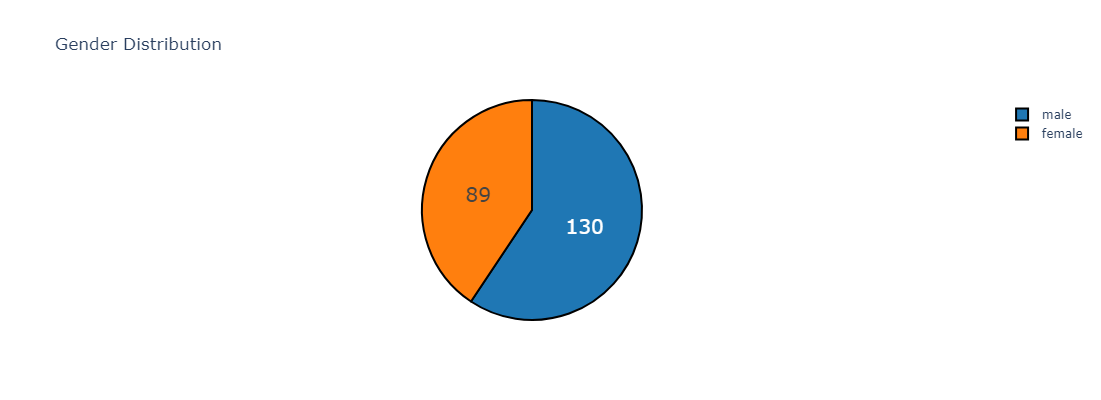

In [10]:
gender_counts = data_previous['Gender'].value_counts()
labels = gender_counts.index.tolist()
values = gender_counts.values.tolist()

colors = ['#1f77b4', '#ff7f0e']  

fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values
)])

fig.update_traces(
    hoverinfo='label+percent',  
    textinfo='value',  
    textfont_size=20, 
    marker=dict(
        colors=colors,  
        line=dict(color='#000000', width=2)  
    )
)

fig.update_layout(
    title='Gender Distribution',
    autosize=False,
    width=600,  
    height=400  
)

fig.show()


C:\Users\Muslim Aqeel\AppData\Local\Temp\ipykernel_12500\2898267720.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




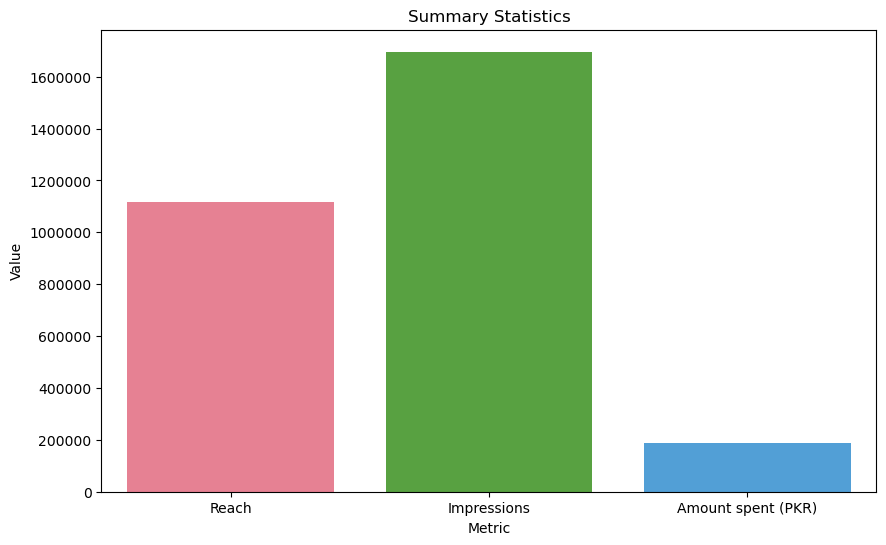

In [11]:
total_reach = data_previous['Reach'].sum()
total_impression = data_previous['Impressions'].sum()
total_amount = data_previous['Amount spent (PKR)'].sum()

d_summary = pd.DataFrame({
    'Metric': ['Reach', 'Impressions', 'Amount spent (PKR)'],
    'Value': [total_reach, total_impression, total_amount]
})

plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(d_summary))
sns.barplot(x='Metric', y='Value', data=d_summary, palette=colors)
plt.title('Summary Statistics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [12]:
data_agg = data_previous.groupby(['Age', 'Gender']).agg({
    'Reach': 'sum',
    'Impressions': 'sum',
    'Amount spent (PKR)': 'sum',
    'Link clicks': 'sum'
}).reset_index()

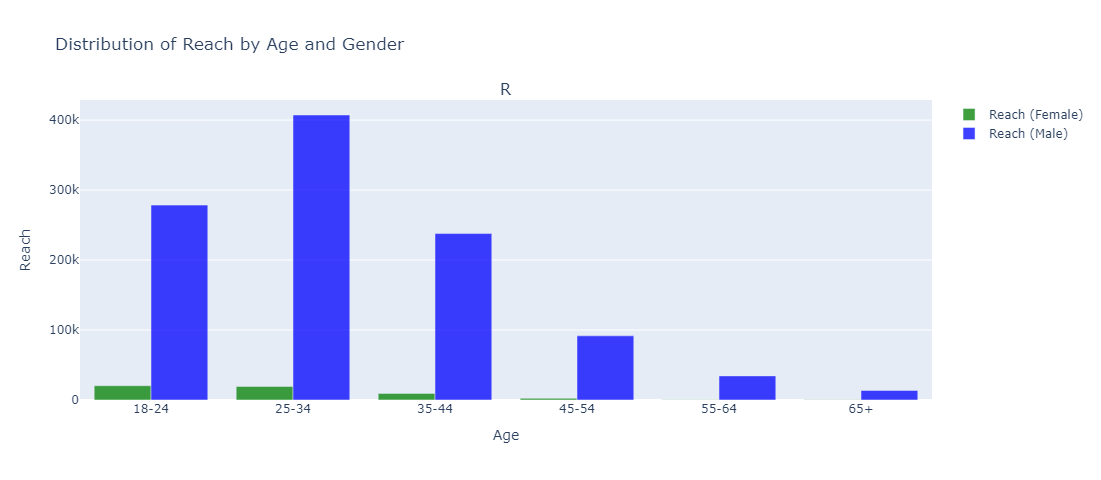

In [13]:
data_agg['Gender'] = data_agg['Gender'].str.strip().str.capitalize()
colors = {'Male': 'blue', 'Female': 'green'}

fig = make_subplots(rows=1, cols=1, subplot_titles=('Reach by Age and Gender'))

for gender in data_agg['Gender'].unique():
    filtered_data = data_agg[data_agg['Gender'] == gender]
    fig.add_trace(go.Bar(
        x=filtered_data['Age'],
        y=filtered_data['Reach'],
        name=f'Reach ({gender})',
        marker_color=colors.get(gender, 'gray'),  
        opacity=0.75  
    ), row=1, col=1)

fig.update_layout(
    title_text='Distribution of Reach by Age and Gender',
    xaxis_title='Age',
    yaxis_title='Reach',
    width=850,  
    height=480,  
    barmode='group'  
)

fig.show()


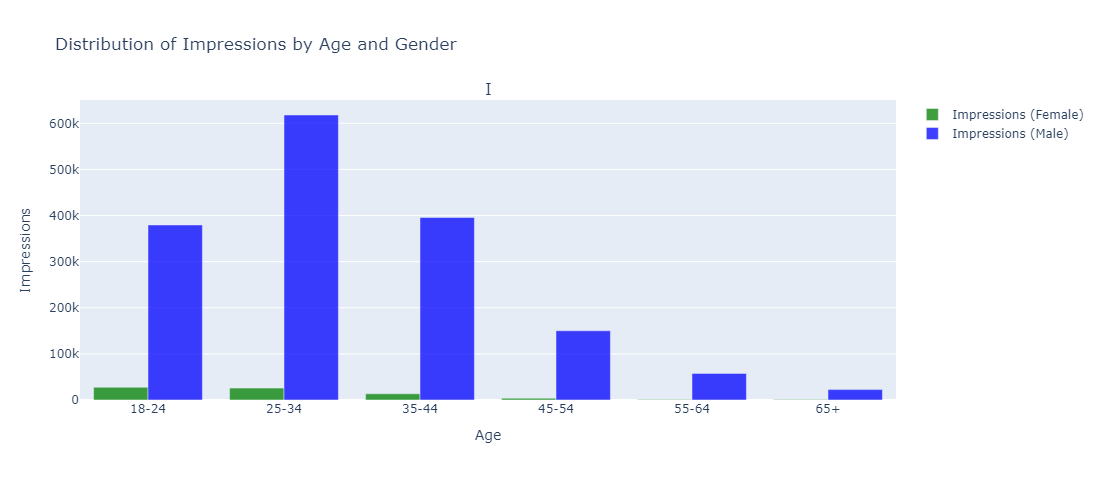

In [14]:
colors = {'Male': 'blue', 'Female': 'green'}

fig = make_subplots(rows=1, cols=1, subplot_titles=('Impressions by Age and Gender'))

for gender in data_agg['Gender'].unique():
    filtered_data = data_agg[data_agg['Gender'] == gender]
    fig.add_trace(go.Bar(
        x=filtered_data['Age'],
        y=filtered_data['Impressions'],
        name=f'Impressions ({gender})',
        marker_color=colors.get(gender, 'gray'),  
        opacity=0.75  # Set opacity to 0.75
    ), row=1, col=1)

# Update layout with increased size
fig.update_layout(
    title_text='Distribution of Impressions by Age and Gender',
    xaxis_title='Age',
    yaxis_title='Impressions',
    width=850,  
    height=480,  
    barmode='group'  
)

fig.show()

In [15]:
data_agg['CPC (cost per link click)']= data_agg['Amount spent (PKR)'] / data_agg['Link clicks']
data_agg['CTR']= data_agg['Link clicks'] / data_agg['Impressions']

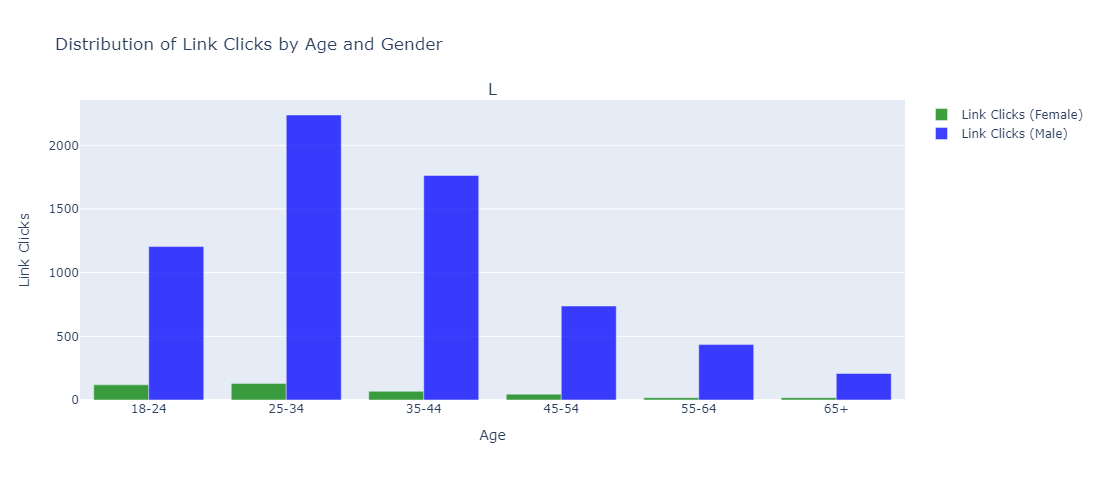

In [16]:
colors = {'Male': 'blue', 'Female': 'green'}

fig = make_subplots(rows=1, cols=1, subplot_titles=('Link Clicks by Age and Gender'))

for gender in data_agg['Gender'].unique():
    filtered_data = data_agg[data_agg['Gender'] == gender]
    fig.add_trace(go.Bar(
        x=filtered_data['Age'],
        y=filtered_data['Link clicks'],
        name=f'Link Clicks ({gender})',
        marker_color=colors.get(gender, 'gray'),  
        opacity=0.75  
    ), row=1, col=1)

fig.update_layout(
    title_text='Distribution of Link Clicks by Age and Gender',
    xaxis_title='Age',
    yaxis_title='Link Clicks',
    width=850,  
    height=480, 
    barmode='group' 
)

fig.show()

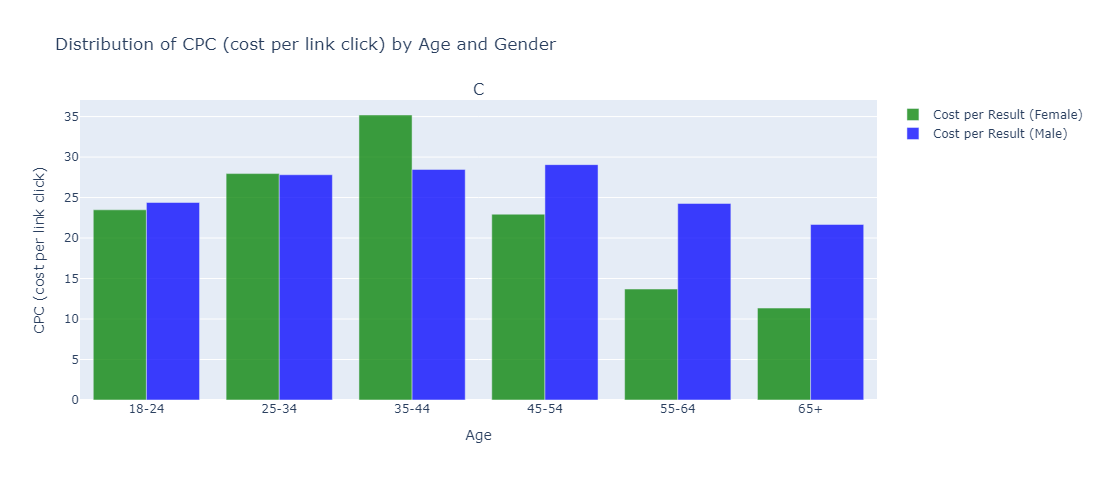

In [17]:
colors = {'Male': 'blue', 'Female': 'green'}

fig_cost_per_result = make_subplots(rows=1, cols=1, subplot_titles=('CPC (cost per link click) by Age and Gender'))

for gender in data_agg['Gender'].unique():
    filtered_data = data_agg[data_agg['Gender'] == gender]
    
    fig_cost_per_result.add_trace(go.Bar(
        x=filtered_data['Age'],
        y=filtered_data['CPC (cost per link click)'],
        name=f'Cost per Result ({gender})',
        marker_color=colors.get(gender, 'gray'),  
        opacity=0.75  
    ))

fig_cost_per_result.update_layout(
    title_text='Distribution of CPC (cost per link click) by Age and Gender',
    xaxis_title='Age',
    yaxis_title='CPC (cost per link click)',
    width=850,  
    height=480,  
    barmode='group'  
)

# Show the plot
fig_cost_per_result.show()

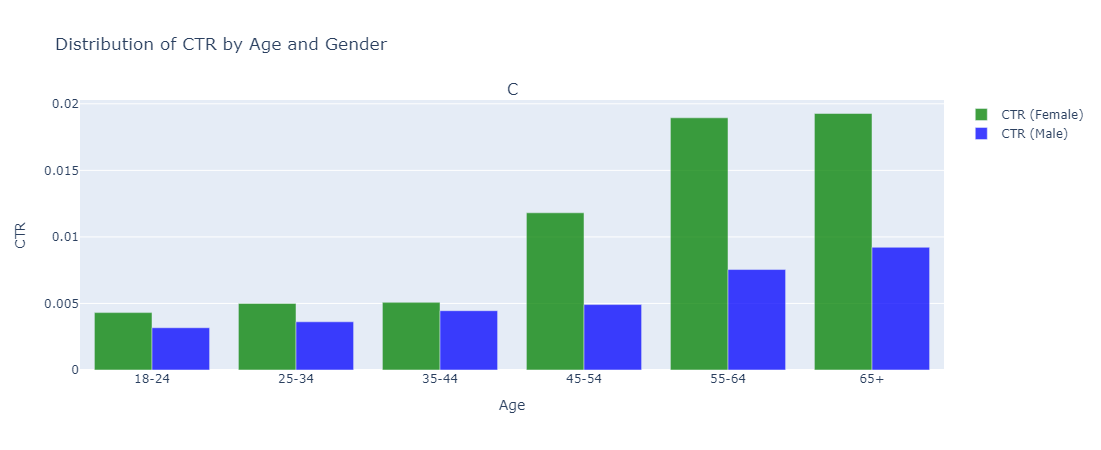

In [18]:
fig_ctr = make_subplots(rows=1, cols=1, subplot_titles=('CTR by Age and Gender'))

for gender in data_agg['Gender'].unique():
    filtered_data = data_agg[data_agg['Gender'] == gender]
    
    fig_ctr.add_trace(go.Bar(
        x=filtered_data['Age'],
        y=filtered_data['CTR'],
        name=f'CTR ({gender})',
        marker_color=colors.get(gender, 'gray'),  
        opacity=0.75 
    ))

fig_ctr.update_layout(
    title_text='Distribution of CTR by Age and Gender',
    xaxis_title='Age',
    yaxis_title='CTR',
    width=880,  
    height=450,  
    barmode='group'  
)

# Show the plot
fig_ctr.show()

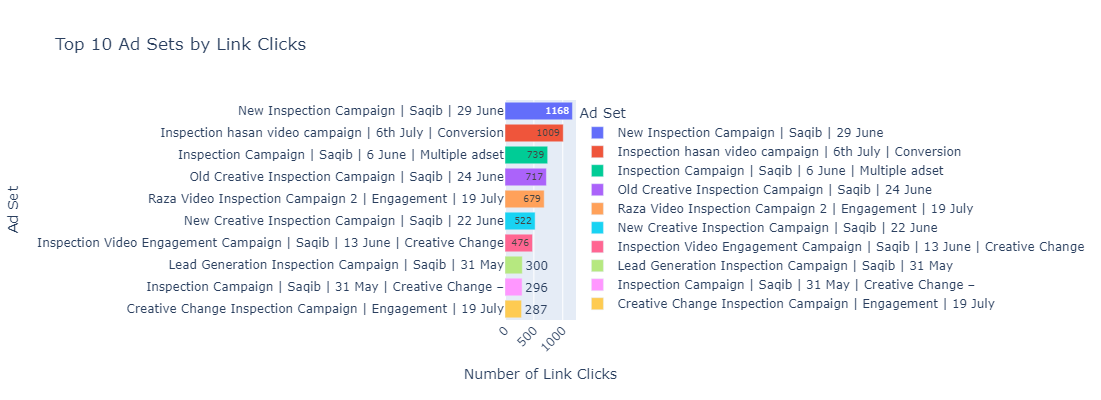

In [19]:
adset_link_clicks = data_previous.groupby('Ad name')['Link clicks'].sum().reset_index()

top_10_adsets = adset_link_clicks.sort_values(by='Link clicks', ascending=False).head(10)

fig = px.bar(top_10_adsets, 
             x='Link clicks', 
             y='Ad name', 
             title='Top 10 Ad Sets by Link Clicks',
             labels={'Link clicks': 'Number of Link Clicks', 'Ad name': 'Ad Set'},
             orientation='h', 
             color='Ad name',  
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text='Link clicks')  

fig.update_layout(
    xaxis_title='Number of Link Clicks',
    yaxis_title='Ad Set',
    width=1400,  
    height=400,  
    xaxis=dict(tickangle=-45)  
)

fig.show()

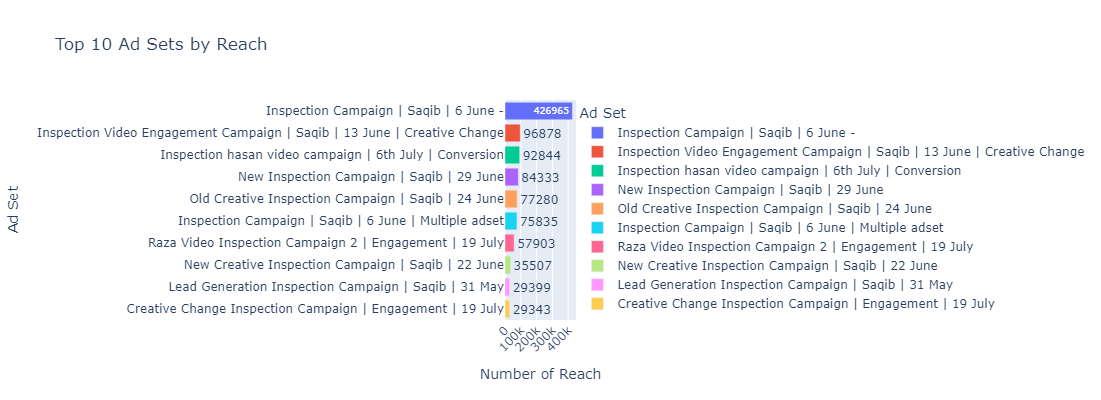

In [20]:
adset_reach = data_previous.groupby('Ad name')['Reach'].sum().reset_index()

top_10_adsets_reach = adset_reach.sort_values(by='Reach', ascending=False).head(10)

fig = px.bar(top_10_adsets_reach, 
             x='Reach', 
             y='Ad name', 
             title='Top 10 Ad Sets by Reach',
             labels={'Reach': 'Number of Reach', 'Ad name': 'Ad Set'},
             orientation='h', 
             color='Ad name',  
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text='Reach')  

fig.update_layout(
    xaxis_title='Number of Reach',
    yaxis_title='Ad Set',
    width=1400,  
    height=400,  
    xaxis=dict(tickangle=-45)  
)


fig.show()

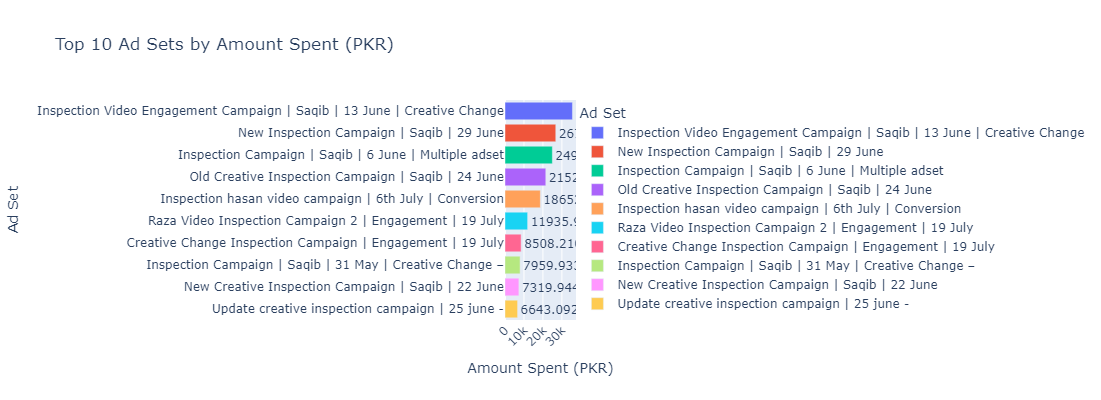

In [21]:
adset_amount_spent = data_previous.groupby('Ad name')['Amount spent (PKR)'].sum().reset_index()
top_10_adsets_amount_spent = adset_amount_spent.sort_values(by='Amount spent (PKR)', ascending=False).head(10)

fig = px.bar(top_10_adsets_amount_spent, 
             x='Amount spent (PKR)', 
             y='Ad name', 
             title='Top 10 Ad Sets by Amount Spent (PKR)',
             labels={'Amount spent (PKR)': 'Amount Spent (PKR)', 'Ad name': 'Ad Set'},
             orientation='h', 
             color='Ad name',  
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text='Amount spent (PKR)')  

fig.update_layout(
    xaxis_title='Amount Spent (PKR)',
    yaxis_title='Ad Set',
    width=1400,  
    height=400,  
    xaxis=dict(tickangle=-45) 
)



fig.show()

C:\Users\Muslim Aqeel\AppData\Local\Temp\ipykernel_12500\2427496308.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



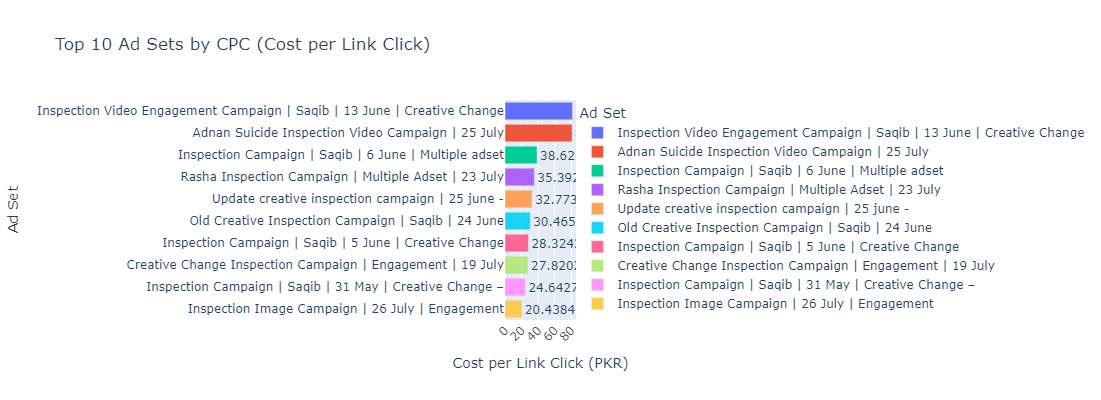

In [22]:
data_previous['CPC'] = data_previous['Amount spent (PKR)'] / data_previous['Link clicks']

adset_cpc = data_previous.groupby('Ad name')['CPC'].mean().reset_index()

top_10_adsets_cpc = adset_cpc.sort_values(by='CPC', ascending=False).head(10)

fig = px.bar(top_10_adsets_cpc, 
             x='CPC', 
             y='Ad name', 
             title='Top 10 Ad Sets by CPC (Cost per Link Click)',
             labels={'CPC': 'Cost per Link Click (PKR)', 'Ad name': 'Ad Set'},
             orientation='h', 
             color='Ad name',  
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text='CPC')  

fig.update_layout(
    xaxis_title='Cost per Link Click (PKR)',
    yaxis_title='Ad Set',
    width=1400,  
    height=400,  
    xaxis=dict(tickangle=-45)  
)

fig.show()

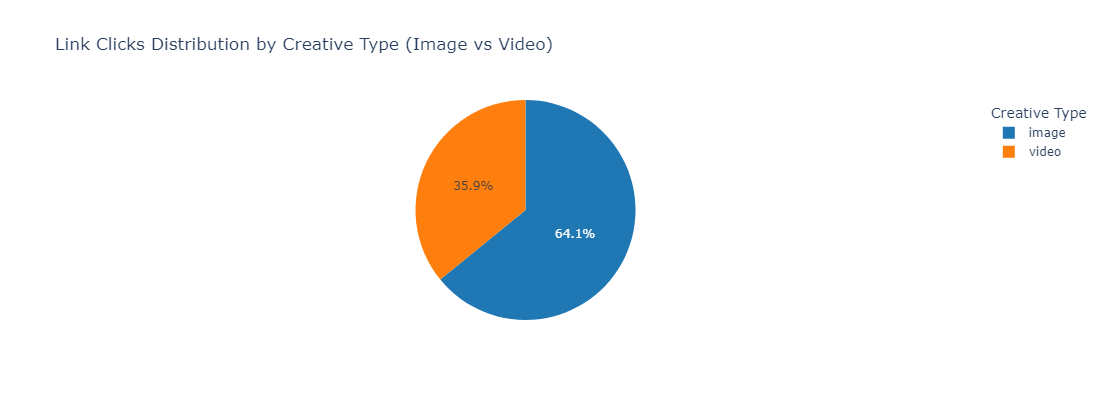

In [23]:
colors = ['#1f77b4', '#ff7f0e']

link_clicks_by_creative = data_previous.groupby('Creative')['Link clicks'].sum().reset_index()

fig = px.pie(link_clicks_by_creative, 
             names='Creative', 
             values='Link clicks',
             title='Link Clicks Distribution by Creative Type (Image vs Video)',
             color_discrete_sequence=colors)

fig.update_layout(
    width=600,
    height=400,
    legend_title='Creative Type',
    showlegend=True,
)

fig.show()

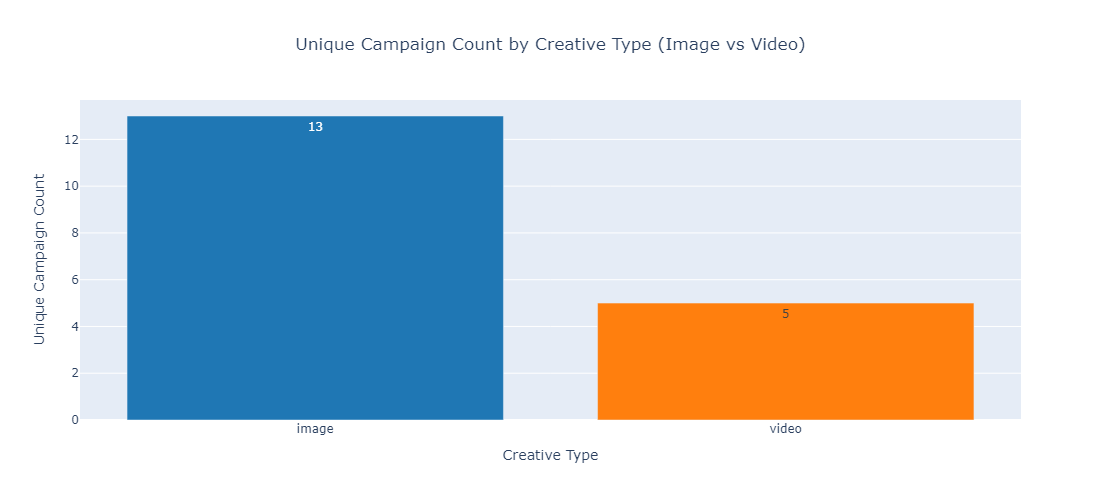

In [24]:
unique_campaigns_by_creative = data_previous.groupby('Creative')['Ad name'].nunique().reset_index()

unique_campaigns_by_creative.columns = ['Creative', 'Unique Campaign Count']

fig = px.bar(unique_campaigns_by_creative, 
             x='Creative', 
             y='Unique Campaign Count', 
             color='Creative',
             title='Unique Campaign Count by Creative Type (Image vs Video)',
             text='Unique Campaign Count',  
             color_discrete_sequence=['#1f77b4', '#ff7f0e'])  


fig.update_layout(
    width=700,
    height=500,
    xaxis_title='Creative Type',
    yaxis_title='Unique Campaign Count',
    showlegend=False,  
    title_x=0.5  
)


fig.show()

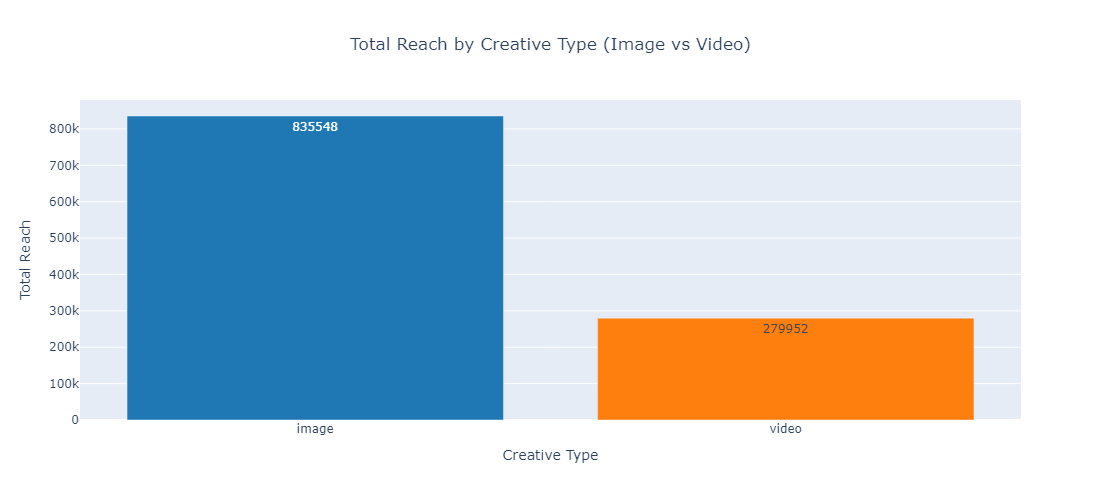

In [25]:


# Group by 'Creative' and calculate the total reach for each type
reach_by_creative = data_previous.groupby('Creative')['Reach'].sum().reset_index()

# Rename columns
reach_by_creative.columns = ['Creative', 'Total Reach']

# Create bar plot using Plotly Express
fig = px.bar(reach_by_creative, 
             x='Creative', 
             y='Total Reach', 
             color='Creative',
             title='Total Reach by Creative Type (Image vs Video)',
             text='Total Reach',  
             color_discrete_sequence=['#1f77b4', '#ff7f0e'])  

# Update layout
fig.update_layout(
    width=700,
    height=500,
    xaxis_title='Creative Type',
    yaxis_title='Total Reach',
    showlegend=False,  
    title_x=0.5  
)

# Show the plot
fig.show()

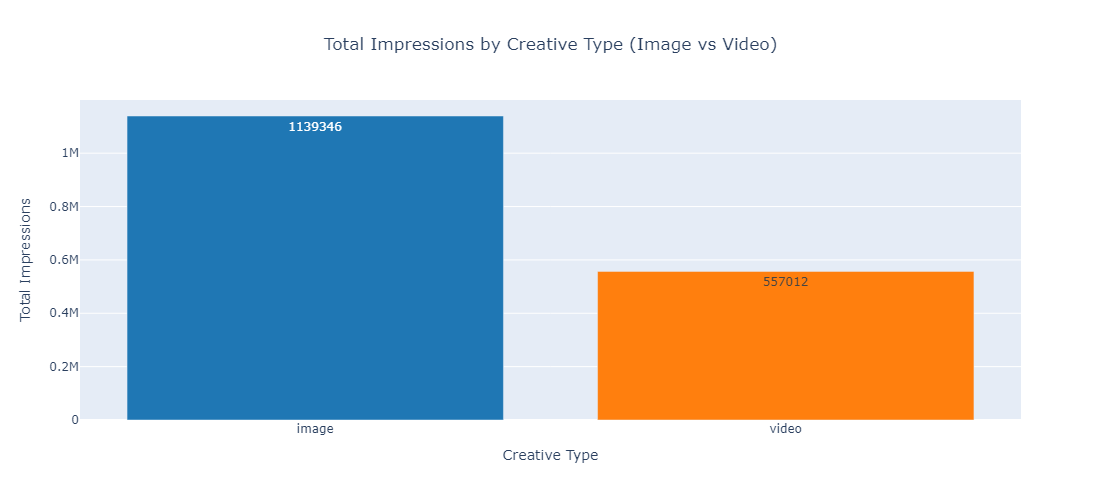

In [26]:
impressions_by_creative = data_previous.groupby('Creative')['Impressions'].sum().reset_index()

# Rename columns
impressions_by_creative.columns = ['Creative', 'Total Impressions']

# Create bar plot for Impressions
fig_impressions = px.bar(impressions_by_creative, 
                         x='Creative', 
                         y='Total Impressions', 
                         color='Creative',
                         title='Total Impressions by Creative Type (Image vs Video)',
                         text='Total Impressions',  
                         color_discrete_sequence=['#1f77b4', '#ff7f0e'])

# Update layout
fig_impressions.update_layout(
    width=700,
    height=500,
    xaxis_title='Creative Type',
    yaxis_title='Total Impressions',
    showlegend=False,
    title_x=0.5
)

# Show the plot
fig_impressions.show()

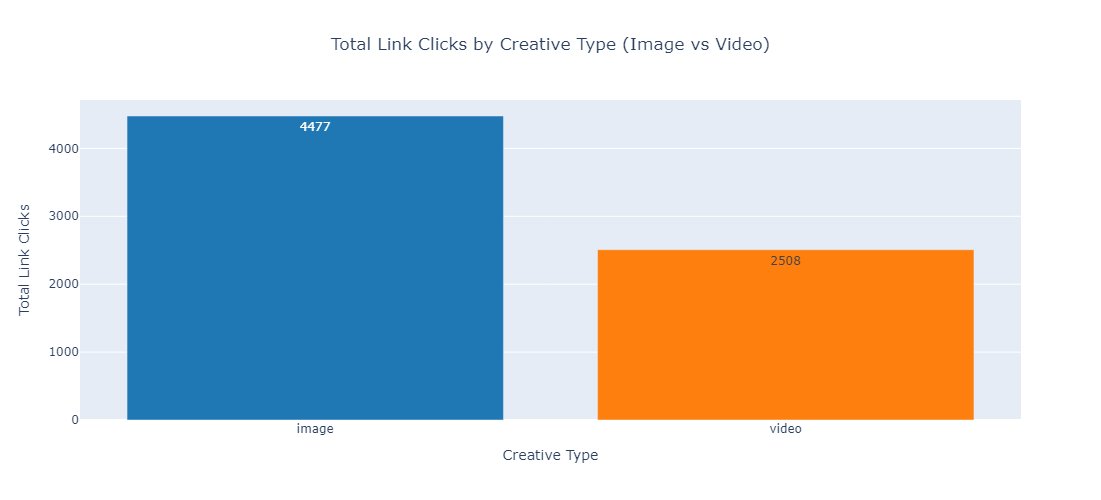

In [27]:
clicks_by_creative = data_previous.groupby('Creative')['Link clicks'].sum().reset_index()

# Rename columns
clicks_by_creative.columns = ['Creative', 'Total Link Clicks']

# Create bar plot for Link Clicks
fig_clicks = px.bar(clicks_by_creative, 
                    x='Creative', 
                    y='Total Link Clicks', 
                    color='Creative',
                    title='Total Link Clicks by Creative Type (Image vs Video)',
                    text='Total Link Clicks',  
                    color_discrete_sequence=['#1f77b4', '#ff7f0e'])

# Update layout
fig_clicks.update_layout(
    width=700,
    height=500,
    xaxis_title='Creative Type',
    yaxis_title='Total Link Clicks',
    showlegend=False,
    title_x=0.5
)

# Show the plot
fig_clicks.show()

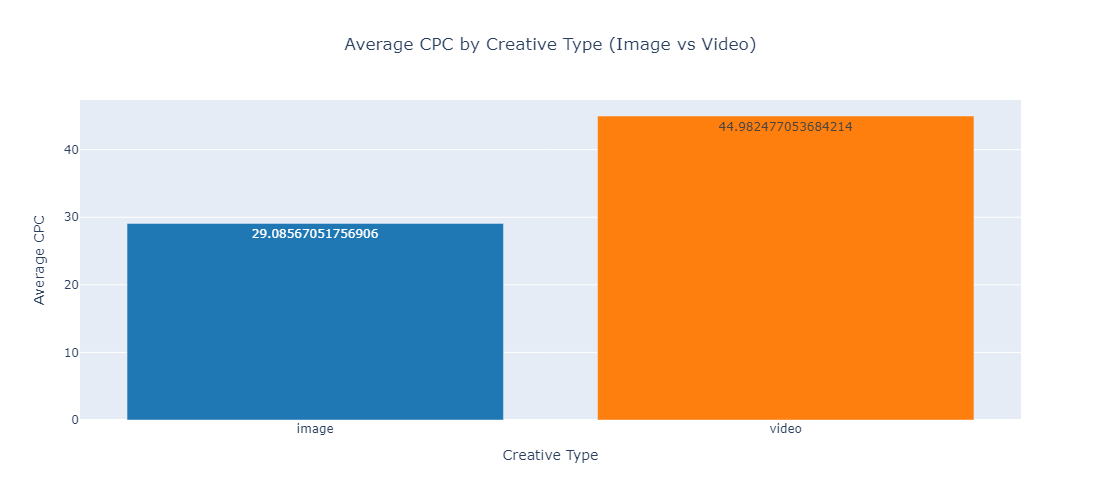

In [28]:
#data_previous['Creative'].fillna('image', inplace=True)

# Group by 'Creative' and calculate the average CPC
cpc_by_creative = data_previous.groupby('Creative')['CPC (cost per link click)'].mean().reset_index()

# Rename columns
cpc_by_creative.columns = ['Creative', 'Average CPC']

# Create bar plot for CPC
fig_cpc = px.bar(cpc_by_creative, 
                 x='Creative', 
                 y='Average CPC', 
                 color='Creative',
                 title='Average CPC by Creative Type (Image vs Video)',
                 text='Average CPC',  
                 color_discrete_sequence=['#1f77b4', '#ff7f0e'])

# Update layout
fig_cpc.update_layout(
    width=700,
    height=500,
    xaxis_title='Creative Type',
    yaxis_title='Average CPC',
    showlegend=False,
    title_x=0.5
)

# Show the plot
fig_cpc.show()

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_previous.columns = data_previous.columns.str.replace(' ', '_')

model = smf.mixedlm('Link_clicks ~ Age', data_previous, groups=data_previous['Ad_name']).fit()

print("Hierarchical Model Summary:")
print(model.summary())


Hierarchical Model Summary:
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Link_clicks
No. Observations: 219     Method:             REML       
No. Groups:       16      Scale:              2840.7142  
Min. group size:  6       Log-Likelihood:     -1169.9776 
Max. group size:  50      Converged:          Yes        
Mean group size:  13.7                                   
---------------------------------------------------------
              Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
---------------------------------------------------------
Intercept     38.249   10.892  3.512 0.000  16.901 59.597
Age[T.25-34]  22.593   11.804  1.914 0.056  -0.542 45.728
Age[T.35-44]  11.373   11.950  0.952 0.341 -12.049 34.794
Age[T.45-54] -12.730   12.261 -1.038 0.299 -36.762 11.302
Age[T.55-64] -20.763   12.887 -1.611 0.107 -46.020  4.494
Age[T.65+]   -30.959   13.286 -2.330 0.020 -56.999 -4.919
Group Var    677.010    6.518                         

In [30]:
data_previous['Age'] = data_previous['Age'].replace({'18-24': 1, '25-34': 2, '35-44': 3, '45-54': 4, '55-64': 5, '65+': 6}).astype(int)
data_previous

C:\Users\Muslim Aqeel\AppData\Local\Temp\ipykernel_12500\4051342878.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\Muslim Aqeel\AppData\Local\Temp\ipykernel_12500\4051342878.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Age  Gender                                            Ad_name  Reach  \
5      2    male  Inspection Video Engagement Campaign | Saqib |...  32048   
8      3    male  Inspection Video Engagement Campaign | Saqib |...  20258   
9      2    male          New Inspection Campaign | Saqib | 29 June  27872   
11     3    male          New Inspection Campaign | Saqib | 29 June  24906   
12     2    male  Inspection hasan video campaign | 6th July | C...  39247   
..   ...     ...                                                ...    ...   
404    6  female  Inspection hasan video campaign | 6th July | C...     32   
423    6    male  Inspection Campaign | Saqib | 5 June | Creativ...     48   
447    4  female  Inspection Campaign | Saqib | 6 June | Multipl...     24   
518    6  female   Inspection Image Campaign | 26 July | Engagement      8   
544    5  female  Rasha Inspection Campaign | Multiple Adset | 2...      8   

     Impressions  Frequency                      Result_Type  Results  \
5          63370   1.977346  Messaging conversations started     53.0   
8          41415   2.044378  Messaging conversations started     54.0   
9          64790   2.324555  Messaging conversations started    102.0   
11         59259   2.379306  Messaging conversations started     88.0   
12         89907   2.290799  Messaging conversations started    163.0   
..           ...        ...                              ...      ...   
404          109   3.406250  Messaging conversations started      1.0   
423           53   1.104167                              NaN      NaN   
447           49   2.041667  Messaging conversations started      1.0   
518           20   2.500000                              NaN      NaN   
544           10   1.250000  Messaging conversations started      1.0   

     Cost_per_result  Amount_spent_(PKR)  CPM_(cost_per_1,000_impressions)  \
5         199.963166        10598.047830                        167.240774   
8         160.781466         8682.199148                        209.638999   
9          84.705644         8639.975658                        133.353537   
11         92.250343         8118.030148                        136.992358   
12         47.339472         7716.333899                         85.825730   
..               ...                 ...                               ...   
404        11.202077           11.202077                        102.771346   
423              NaN            8.845364                        166.893652   
447         6.344475            6.344475                        129.479074   
518              NaN            2.394458                        119.722881   
544         1.548280            1.548280                        154.827972   

     Link_clicks  CPC_(cost_per_link_click)  CTR_(link_click-through_rate)  \
5          140.0                  75.700342                       0.220925   
8          103.0                  84.293196                       0.248702   
9          336.0                  25.714213                       0.518599   
11         336.0                  24.160804                       0.567002   
12         412.0                  18.728966                       0.458251   
..           ...                        ...                            ...   
404          2.0                   5.601038                       1.834862   
423          1.0                   8.845364                       1.886792   
447          1.0                   6.344475                       2.040816   
518          1.0                   2.394458                       5.000000   
544          1.0                   1.548280                      10.000000   

    Reporting_starts Reporting_ends Creative        CPC  
5           6/1/2024      8/27/2024    video  75.700342  
8           6/1/2024      8/27/2024    video  84.293196  
9           6/1/2024      8/27/2024    video  25.714213  
11          6/1/2024      8/27/2024    image  24.160804  
12          6/1/2024      8

In [31]:
data_previous.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 5 to 544
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               219 non-null    int32  
 1   Gender                            219 non-null    object 
 2   Ad_name                           219 non-null    object 
 3   Reach                             219 non-null    int64  
 4   Impressions                       219 non-null    int64  
 5   Frequency                         219 non-null    float64
 6   Result_Type                       165 non-null    object 
 7   Results                           165 non-null    float64
 8   Cost_per_result                   165 non-null    float64
 9   Amount_spent_(PKR)                219 non-null    float64
 10  CPM_(cost_per_1,000_impressions)  219 non-null    float64
 11  Link_clicks                       219 non-null    float64
 12  CPC_(cost_per

## Importing New Adset Data

In [32]:
data_after= pd.read_csv(r'C:\Users\Muslim Aqeel\Downloads\Data-New-Adset-After.csv')

In [33]:
data_after

Age   Gender                                            Ad name  Reach  \
0    25-34     male     Inspection muzammil video campaign | 10 August  26894   
1    25-34     male            Sale my car video campaign | 6th August  49832   
2    18-24     male            Sale my car video campaign | 6th August  39853   
3    35-44     male            Sale my car video campaign | 6th August  37422   
4    25-34     male  Again Run For Narzish Inspection hassan video ...  28180   
..     ...      ...                                                ...    ...   
505  18-24  unknown      Car Insurance Shehzad Video Campaign | 9 July      1   
506    65+  unknown  New Creative Inspection Image Campaign | 17th ...      0   
507  55-64  unknown  For Website Animated Inspection Image Campaign...      6   
508    65+  unknown  For Website Animated Inspection Image Campaign...      0   
509  18-24  unknown  Animation Bidding Video Website Traffic Campai...      0   

     Impressions  Frequency                      Result Type  Results  \
0          51307   1.907749  Messaging conversations started     99.0   
1         101580   2.038449                      Link clicks  15115.0   
2          83588   2.097408                      Link clicks  12465.0   
3          82655   2.208727                      Link clicks  12185.0   
4          48814   1.732221  Messaging conversations started     71.0   
..           ...        ...                              ...      ...   
505            1   1.000000                              NaN      NaN   
506            1   0.000000                              NaN      NaN   
507            6   1.000000                              NaN      NaN   
508            1   0.000000                              NaN      NaN   
509            1   0.000000                              NaN      NaN   

     Cost per result  Amount spent (PKR)  CPM (cost per 1,000 impressions)  \
0         104.842793        10379.436550                        202.300593   
1           0.668075        10097.957000                         99.408909   
2           0.681574         8495.823227                        101.639269   
3           0.666027         8115.534949                         98.185651   
4         109.279767         7758.863475                        158.947504   
..               ...                 ...                               ...   
505              NaN            0.049901                         49.901083   
506              NaN            0.049640                         49.639609   
507              NaN            0.039796                          6.632614   
508              NaN            0.019898                         19.897841   
509              NaN            0.019631                         19.630696   

     Link clicks  CPC (cost per link click)  CTR (link click-through rate)  \
0          214.0                  48.502040                       0.417097   
1        15115.0                   0.668075                      14.879898   
2        12465.0                   0.681574                      14.912428   
3        12185.0                   0.666027                      14.742000   
4          180.0                  43.104797                       0.368747   
..           ...                        ...                            ...   
505          NaN                        NaN                            NaN   
506          NaN                        NaN                            NaN   
507          NaN                        NaN                            NaN   
508          NaN                        NaN                            NaN   
509          NaN                        NaN                            NaN   

    Reporting starts Reporting ends Creative  
0           8/1/2024       9/5/2024    video  
1           8/1/2024       9/5/2024      NaN  
2           8/1/2024       9/5/2024      NaN  
3           8/1/2024       9/5/2024      NaN  
4           8/1/2024       9/5/2024    video  
.

In [34]:
data_after = data_after.dropna(subset=['Creative'])

In [35]:
data_after = data_after[data_after['Gender'] != 'unknown']
print(data_after['Gender'].value_counts())

Gender
male      162
female    113
Name: count, dtype: int64


In [36]:
data_after = data_after.dropna(subset=['Link clicks'])
data_after.isnull().sum()

Age                                  0
Gender                               0
Ad name                              0
Reach                                0
Impressions                          0
Frequency                            0
Result Type                         63
Results                             63
Cost per result                     63
Amount spent (PKR)                   0
CPM (cost per 1,000 impressions)     0
Link clicks                          0
CPC (cost per link click)            0
CTR (link click-through rate)        0
Reporting starts                     0
Reporting ends                       0
Creative                             0
dtype: int64

In [37]:
data_after

Age  Gender                                            Ad name  Reach  \
0    25-34    male     Inspection muzammil video campaign | 10 August  26894   
4    25-34    male  Again Run For Narzish Inspection hassan video ...  28180   
5    25-34    male          Inspection Boss video campaign | 2 August  23766   
6    35-44    male     Inspection muzammil video campaign | 10 August  16631   
7    35-44    male          Inspection Boss video campaign | 2 August  15173   
..     ...     ...                                                ...    ...   
353  55-64  female  Creative Change Inspection Image Campaign | 20...     12   
368  55-64    male  Change The Creative Inspection Image Campaign ...     15   
397  45-54  female     Inspection abdullah video campaign | 20 August     10   
403  18-24  female       Old Creative Inspection Campaign | 13 August      9   
496  55-64  female  Again Run Inspection hassan video campaign | 2...      0   

     Impressions  Frequency                      Result Type  Results  \
0          51307   1.907749  Messaging conversations started     99.0   
4          48814   1.732221  Messaging conversations started     71.0   
5          40075   1.686232  Messaging conversations started     79.0   
6          30855   1.855270  Messaging conversations started     63.0   
7          26307   1.733803  Messaging conversations started     59.0   
..           ...        ...                              ...      ...   
353           14   1.166667  Messaging conversations started      1.0   
368           15   1.000000                              NaN      NaN   
397           10   1.000000  Messaging conversations started      1.0   
403           12   1.333333                              NaN      NaN   
496            1   0.000000                              NaN      NaN   

     Cost per result  Amount spent (PKR)  CPM (cost per 1,000 impressions)  \
0         104.842793        10379.436550                        202.300593   
4         109.279767         7758.863475                        158.947504   
5          94.624584         7475.342175                        186.533804   
6         106.673883         6720.454635                        217.807637   
7          92.475330         5456.044468                        207.398961   
..               ...                 ...                               ...   
353         5.202053            5.202053                        371.575242   
368              NaN            4.225460                        281.697353   
397         1.998963            1.998963                        199.896334   
403              NaN            1.770740                        147.561656   
496              NaN            0.109718                        109.717866   

     Link clicks  CPC (cost per link click)  CTR (link click-through rate)  \
0          214.0                  48.502040                       0.417097   
4          180.0                  43.104797                       0.368747   
5          255.0                  29.315067                       0.636307   
6          126.0                  53.336942                       0.408362   
7          152.0                  35.895029                       0.577793   
..           ...                        ...                            ...   
353          1.0                   5.202053                       7.142857   
368          1.0                   4.225460                       6.666667   
397          1.0                   1.998963                      10.000000   
403          1.0                   1.770740                       8.333333   
496          1.0                   0.109718                     100.000000   

    Reporting starts Reporting ends Creative  
0           8/1/2024       9/5/2024    video  
4           8/1/2024       9/5/2024    video  
5           8/1/2024       9/5/2024    video  
6           8/1/2024       9/5/2024    video  
7           8/1/2024       9/5/2024    video  
..           

## Exploratory Data Analysis

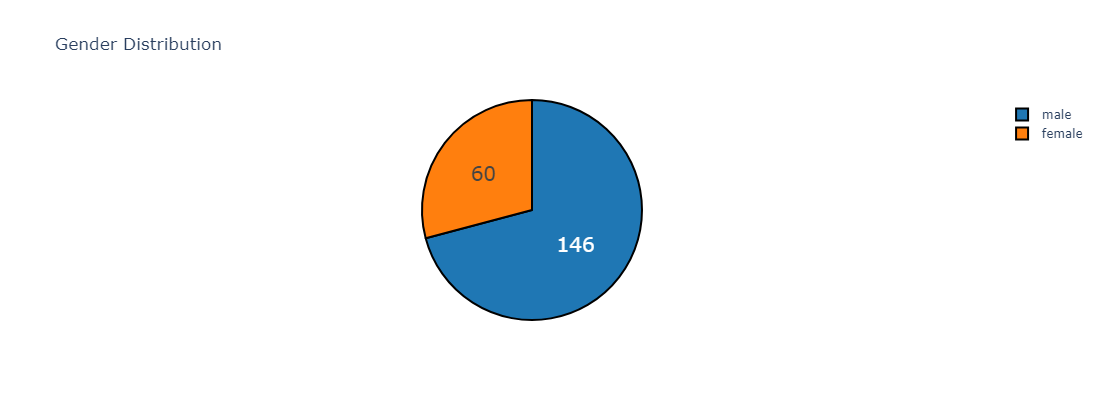

In [38]:
gender_counts = data_after['Gender'].value_counts()
labels = gender_counts.index.tolist()
values = gender_counts.values.tolist()

colors = ['#1f77b4', '#ff7f0e']  

fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values
)])

fig.update_traces(
    hoverinfo='label+percent',  
    textinfo='value',  
    textfont_size=20, 
    marker=dict(
        colors=colors,  
        line=dict(color='#000000', width=2)  
    )
)

fig.update_layout(
    title='Gender Distribution',
    autosize=False,
    width=600,  
    height=400  
)

fig.show()


C:\Users\Muslim Aqeel\AppData\Local\Temp\ipykernel_12500\2979883927.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




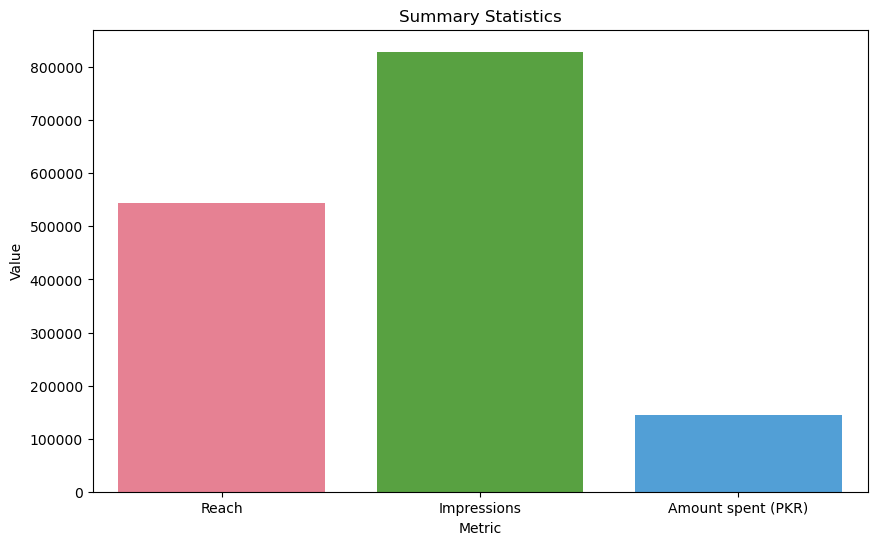

In [39]:
total_reach = data_after['Reach'].sum()
total_impression = data_after['Impressions'].sum()
total_amount = data_after['Amount spent (PKR)'].sum()

d_summary = pd.DataFrame({
    'Metric': ['Reach', 'Impressions', 'Amount spent (PKR)'],
    'Value': [total_reach, total_impression, total_amount]
})

plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(d_summary))
sns.barplot(x='Metric', y='Value', data=d_summary, palette=colors)
plt.title('Summary Statistics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

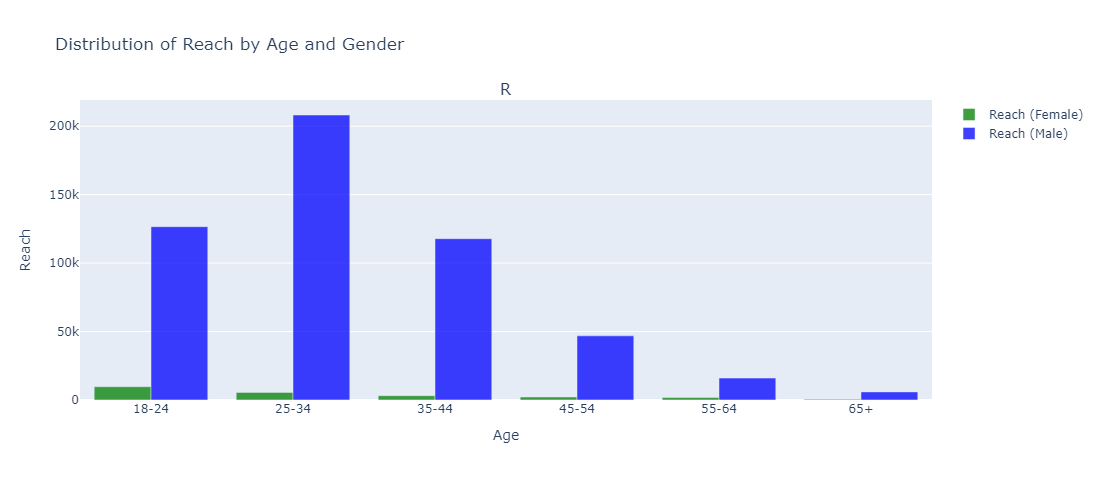

In [40]:
data_aggs = data_after.groupby(['Age', 'Gender']).agg({
    'Reach': 'sum',
    'Impressions': 'sum',
    'Amount spent (PKR)': 'sum',
    'Link clicks': 'sum'
}).reset_index()

data_aggs['Gender'] = data_aggs['Gender'].str.strip().str.capitalize()
colors = {'Male': 'blue', 'Female': 'green'}

fig = make_subplots(rows=1, cols=1, subplot_titles=('Reach by Age and Gender'))

for gender in data_aggs['Gender'].unique():
    filtered_data = data_aggs[data_aggs['Gender'] == gender]
    fig.add_trace(go.Bar(
        x=filtered_data['Age'],
        y=filtered_data['Reach'],
        name=f'Reach ({gender})',
        marker_color=colors.get(gender, 'gray'),  
        opacity=0.75  
    ), row=1, col=1)

fig.update_layout(
    title_text='Distribution of Reach by Age and Gender',
    xaxis_title='Age',
    yaxis_title='Reach',
    width=850,  
    height=480,  
    barmode='group'  
)

fig.show()


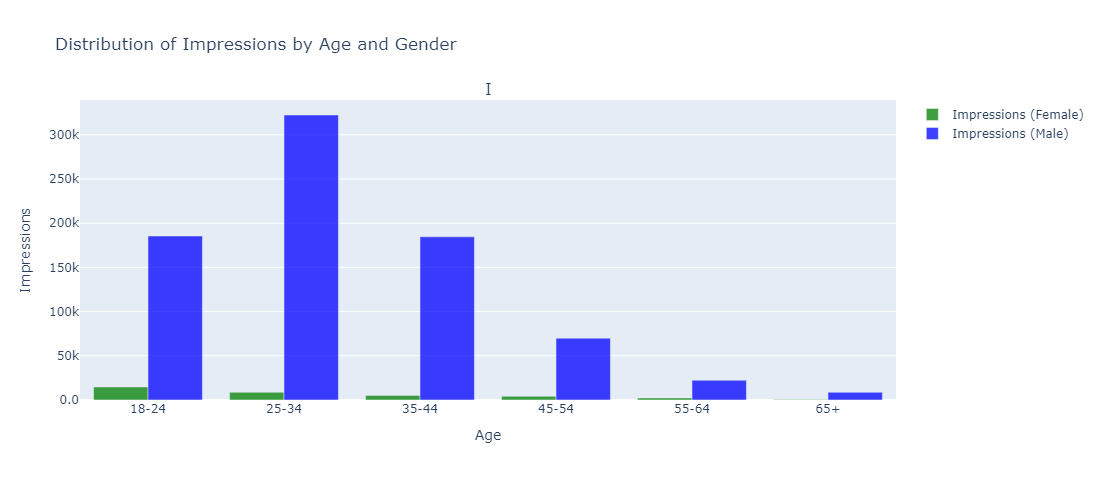

In [41]:
colors = {'Male': 'blue', 'Female': 'green'}

# Create the subplot
fig = make_subplots(rows=1, cols=1, subplot_titles=('Impressions by Age and Gender'))

# Loop through unique genders and create bar traces
for gender in data_aggs['Gender'].unique():
    filtered_data = data_aggs[data_aggs['Gender'] == gender]
    fig.add_trace(go.Bar(
        x=filtered_data['Age'],
        y=filtered_data['Impressions'],
        name=f'Impressions ({gender})',
        marker_color=colors.get(gender, 'gray'),  
        opacity=0.75  
    ), row=1, col=1)

# Update the layout and format y-axis to show numbers in 'k' (thousands)
fig.update_layout(
    title_text='Distribution of Impressions by Age and Gender',
    xaxis_title='Age',
    yaxis_title='Impressions',
    width=850,  
    height=480,  
    barmode='group',
    yaxis_tickformat='.2s',  # Use '.2s' to format numbers with metric prefixes (e.g., 800k)
)

# Show the figure
fig.show()

In [42]:
data_aggs['CPC (cost per link click)']= data_aggs['Amount spent (PKR)'] / data_aggs['Link clicks']
data_aggs['CTR']= data_aggs['Link clicks'] / data_aggs['Impressions']

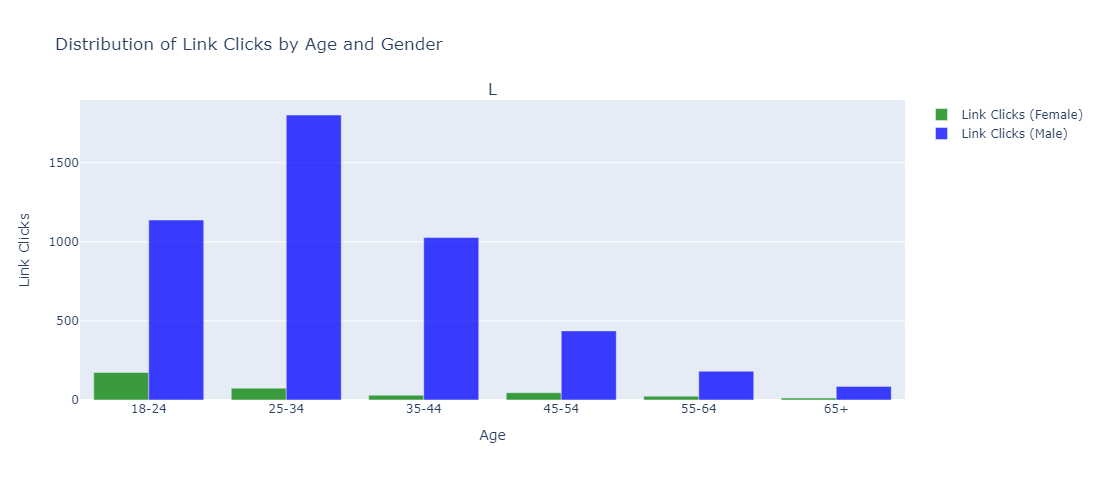

In [43]:
colors = {'Male': 'blue', 'Female': 'green'}

fig = make_subplots(rows=1, cols=1, subplot_titles=('Link Clicks by Age and Gender'))

for gender in data_aggs['Gender'].unique():
    filtered_data = data_aggs[data_aggs['Gender'] == gender]
    fig.add_trace(go.Bar(
        x=filtered_data['Age'],
        y=filtered_data['Link clicks'],
        name=f'Link Clicks ({gender})',
        marker_color=colors.get(gender, 'gray'),  
        opacity=0.75  
    ), row=1, col=1)

fig.update_layout(
    title_text='Distribution of Link Clicks by Age and Gender',
    xaxis_title='Age',
    yaxis_title='Link Clicks',
    width=850,  
    height=480, 
    barmode='group' 
)

fig.show()

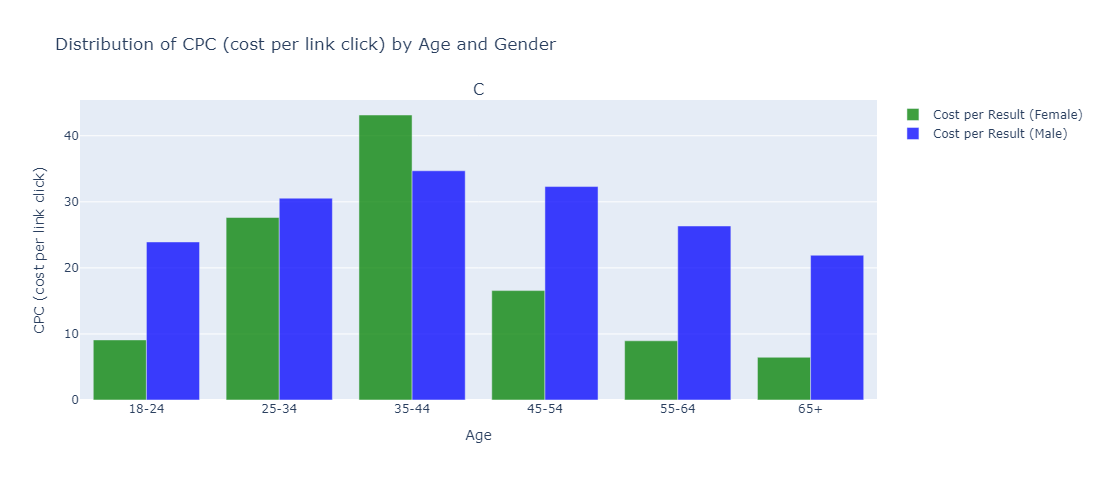

In [44]:
colors = {'Male': 'blue', 'Female': 'green'}

fig_cost_per_result = make_subplots(rows=1, cols=1, subplot_titles=('CPC (cost per link click) by Age and Gender'))

for gender in data_aggs['Gender'].unique():
    filtered_data = data_aggs[data_aggs['Gender'] == gender]
    
    fig_cost_per_result.add_trace(go.Bar(
        x=filtered_data['Age'],
        y=filtered_data['CPC (cost per link click)'],
        name=f'Cost per Result ({gender})',
        marker_color=colors.get(gender, 'gray'),  
        opacity=0.75  
    ))

fig_cost_per_result.update_layout(
    title_text='Distribution of CPC (cost per link click) by Age and Gender',
    xaxis_title='Age',
    yaxis_title='CPC (cost per link click)',
    width=850,  
    height=480,  
    barmode='group'  
)

# Show the plot
fig_cost_per_result.show()

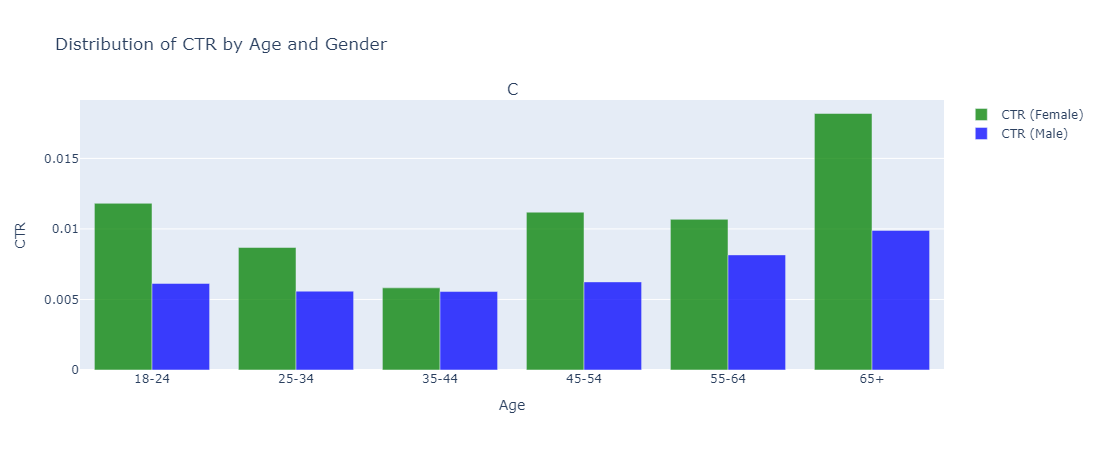

In [45]:
fig_ctr = make_subplots(rows=1, cols=1, subplot_titles=('CTR by Age and Gender'))

for gender in data_aggs['Gender'].unique():
    filtered_data = data_aggs[data_aggs['Gender'] == gender]
    
    fig_ctr.add_trace(go.Bar(
        x=filtered_data['Age'],
        y=filtered_data['CTR'],
        name=f'CTR ({gender})',
        marker_color=colors.get(gender, 'gray'),  
        opacity=0.75 
    ))

fig_ctr.update_layout(
    title_text='Distribution of CTR by Age and Gender',
    xaxis_title='Age',
    yaxis_title='CTR',
    width=880,  
    height=450,  
    barmode='group'  
)

# Show the plot
fig_ctr.show()

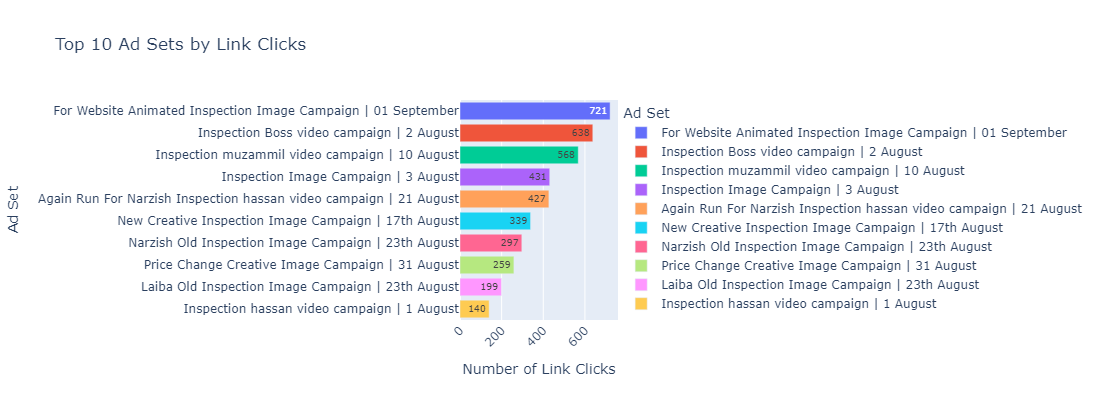

In [46]:
adset_link_clicks = data_after.groupby('Ad name')['Link clicks'].sum().reset_index()

top_10_adsets = adset_link_clicks.sort_values(by='Link clicks', ascending=False).head(10)

fig = px.bar(top_10_adsets, 
             x='Link clicks', 
             y='Ad name', 
             title='Top 10 Ad Sets by Link Clicks',
             labels={'Link clicks': 'Number of Link Clicks', 'Ad name': 'Ad Set'},
             orientation='h', 
             color='Ad name',  
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text='Link clicks')  

fig.update_layout(
    xaxis_title='Number of Link Clicks',
    yaxis_title='Ad Set',
    width=1400,  
    height=400,  
    xaxis=dict(tickangle=-45)  
)

fig.show()

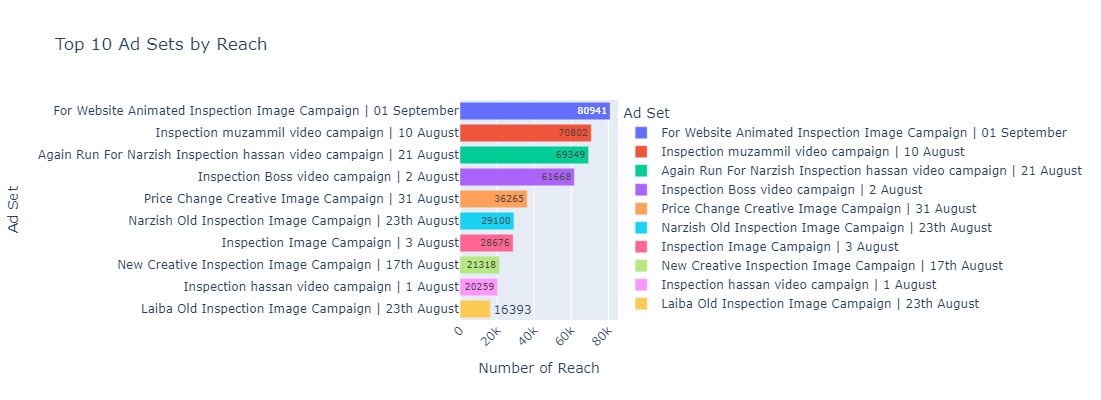

In [47]:
adset_reach = data_after.groupby('Ad name')['Reach'].sum().reset_index()

top_10_adsets_reach = adset_reach.sort_values(by='Reach', ascending=False).head(10)

fig = px.bar(top_10_adsets_reach, 
             x='Reach', 
             y='Ad name', 
             title='Top 10 Ad Sets by Reach',
             labels={'Reach': 'Number of Reach', 'Ad name': 'Ad Set'},
             orientation='h', 
             color='Ad name',  
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text='Reach')  

fig.update_layout(
    xaxis_title='Number of Reach',
    yaxis_title='Ad Set',
    width=1400,  
    height=400,  
    xaxis=dict(tickangle=-45)  
)


fig.show()

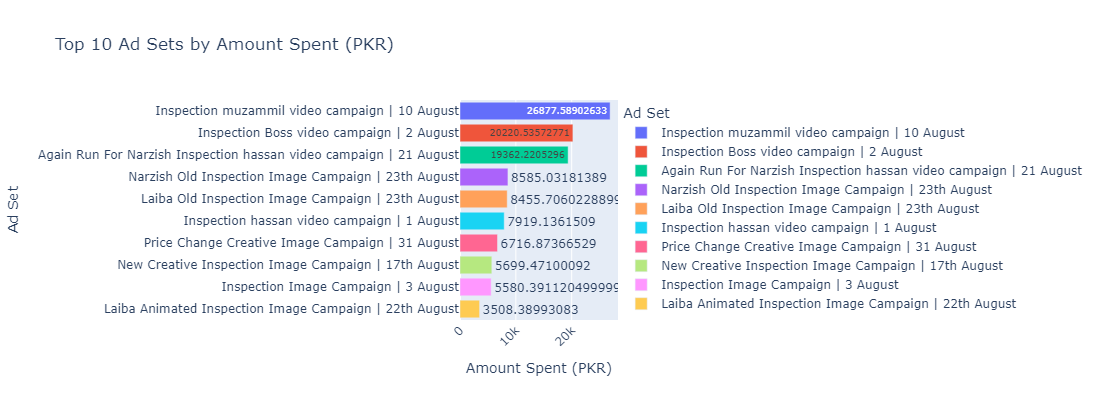

In [48]:
adset_amount_spent = data_after.groupby('Ad name')['Amount spent (PKR)'].sum().reset_index()
top_10_adsets_amount_spent = adset_amount_spent.sort_values(by='Amount spent (PKR)', ascending=False).head(10)

fig = px.bar(top_10_adsets_amount_spent, 
             x='Amount spent (PKR)', 
             y='Ad name', 
             title='Top 10 Ad Sets by Amount Spent (PKR)',
             labels={'Amount spent (PKR)': 'Amount Spent (PKR)', 'Ad name': 'Ad Set'},
             orientation='h', 
             color='Ad name',  
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text='Amount spent (PKR)')  

fig.update_layout(
    xaxis_title='Amount Spent (PKR)',
    yaxis_title='Ad Set',
    width=1400,  
    height=400,  
    xaxis=dict(tickangle=-45) 
)



fig.show()

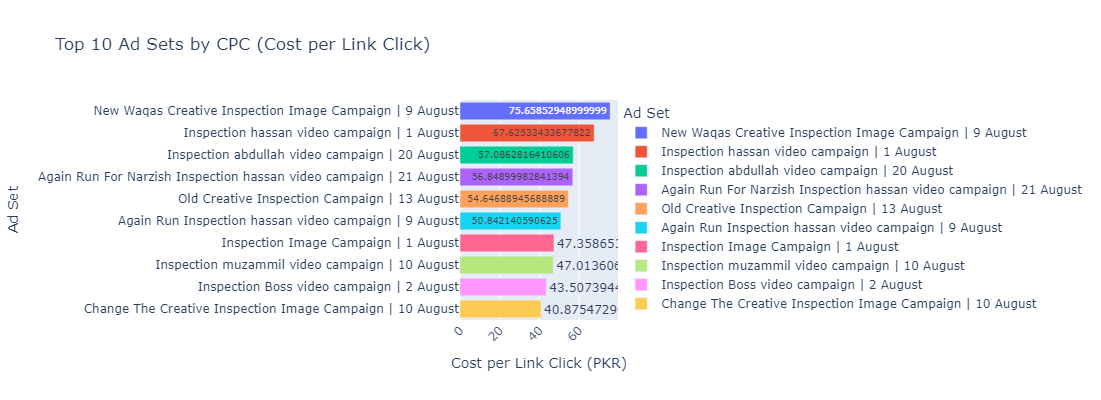

In [49]:
data_after['CPC'] = data_after['Amount spent (PKR)'] / data_after['Link clicks']

adset_cpc = data_after.groupby('Ad name')['CPC'].mean().reset_index()

top_10_adsets_cpc = adset_cpc.sort_values(by='CPC', ascending=False).head(10)

fig = px.bar(top_10_adsets_cpc, 
             x='CPC', 
             y='Ad name', 
             title='Top 10 Ad Sets by CPC (Cost per Link Click)',
             labels={'CPC': 'Cost per Link Click (PKR)', 'Ad name': 'Ad Set'},
             orientation='h', 
             color='Ad name',  
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text='CPC')  

fig.update_layout(
    xaxis_title='Cost per Link Click (PKR)',
    yaxis_title='Ad Set',
    width=1400,  
    height=400,  
    xaxis=dict(tickangle=-45)  
)

fig.show()

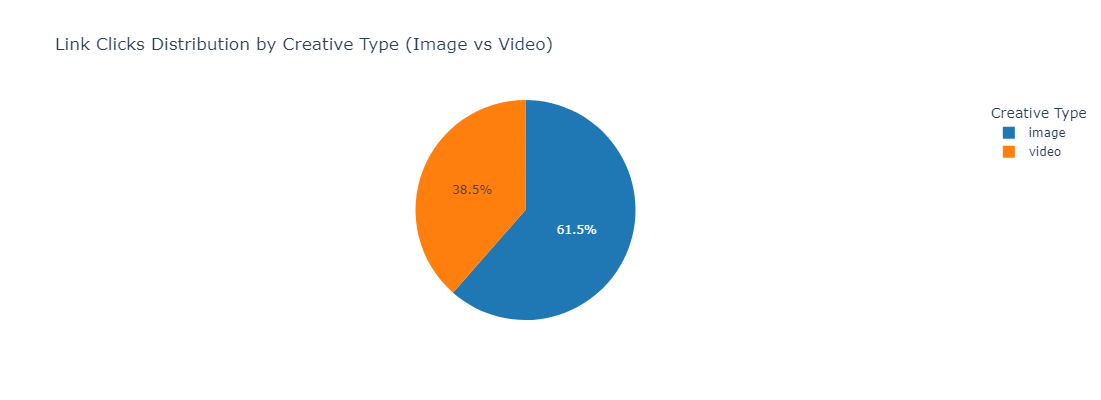

In [50]:
colors = ['#1f77b4', '#ff7f0e']

link_clicks_by_creative = data_after.groupby('Creative')['Link clicks'].sum().reset_index()

fig = px.pie(link_clicks_by_creative, 
             names='Creative', 
             values='Link clicks',
             title='Link Clicks Distribution by Creative Type (Image vs Video)',
             color_discrete_sequence=colors)

fig.update_layout(
    width=600,
    height=400,
    legend_title='Creative Type',
    showlegend=True,
)

fig.show()

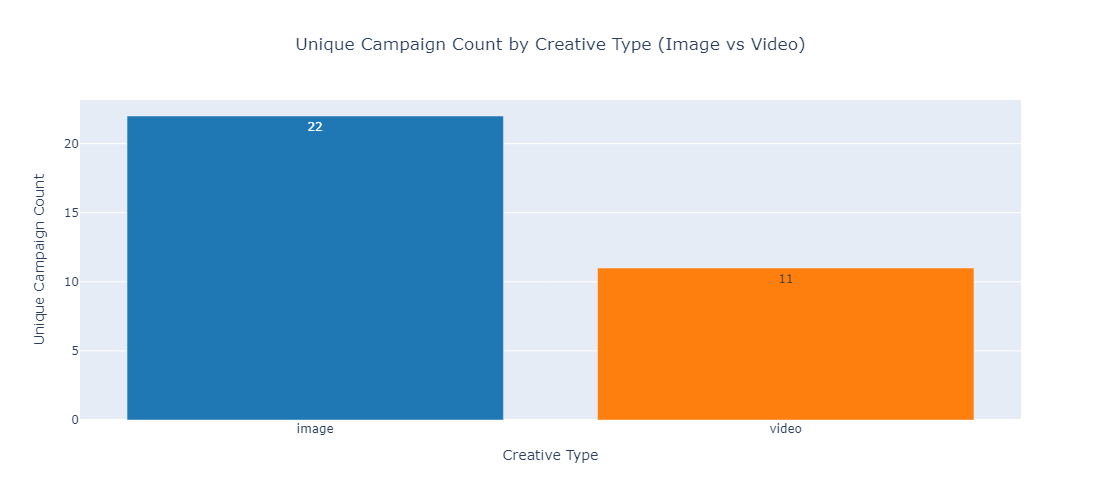

In [51]:
unique_campaigns_by_creative = data_after.groupby('Creative')['Ad name'].nunique().reset_index()

unique_campaigns_by_creative.columns = ['Creative', 'Unique Campaign Count']

fig = px.bar(unique_campaigns_by_creative, 
             x='Creative', 
             y='Unique Campaign Count', 
             color='Creative',
             title='Unique Campaign Count by Creative Type (Image vs Video)',
             text='Unique Campaign Count',  
             color_discrete_sequence=['#1f77b4', '#ff7f0e'])  


fig.update_layout(
    width=700,
    height=500,
    xaxis_title='Creative Type',
    yaxis_title='Unique Campaign Count',
    showlegend=False,  
    title_x=0.5  
)


fig.show()

C:\Users\Muslim Aqeel\AppData\Local\Temp\ipykernel_12500\2017071199.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





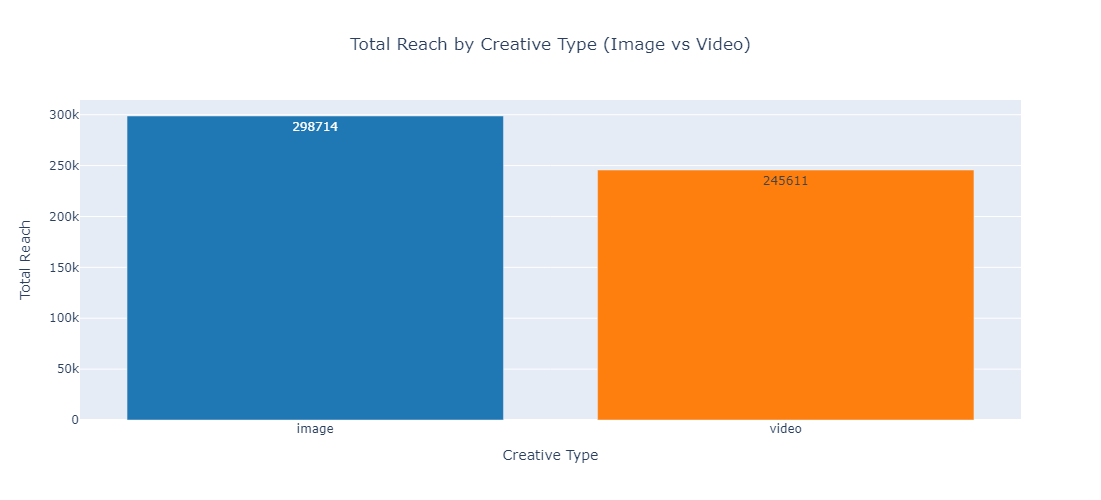

In [52]:
data_after['Creative'].fillna('image', inplace=True)

# Group by 'Creative' and calculate the total reach for each type
reach_by_creative = data_after.groupby('Creative')['Reach'].sum().reset_index()

# Rename columns
reach_by_creative.columns = ['Creative', 'Total Reach']

# Create bar plot using Plotly Express
fig = px.bar(reach_by_creative, 
             x='Creative', 
             y='Total Reach', 
             color='Creative',
             title='Total Reach by Creative Type (Image vs Video)',
             text='Total Reach',  
             color_discrete_sequence=['#1f77b4', '#ff7f0e'])  

# Update layout
fig.update_layout(
    width=700,
    height=500,
    xaxis_title='Creative Type',
    yaxis_title='Total Reach',
    showlegend=False,  
    title_x=0.5  
)

# Show the plot
fig.show()

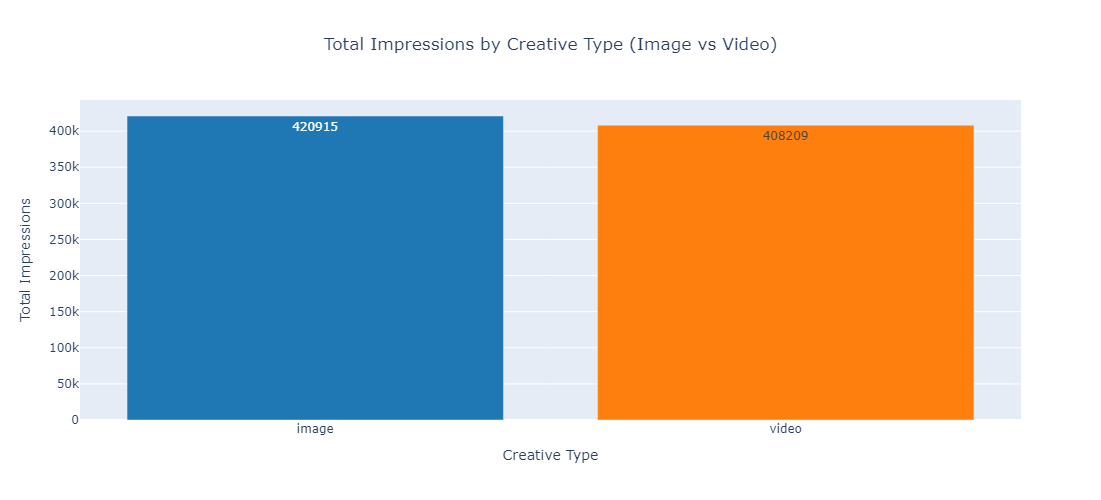

In [53]:
impressions_by_creative = data_after.groupby('Creative')['Impressions'].sum().reset_index()

# Rename columns
impressions_by_creative.columns = ['Creative', 'Total Impressions']

# Create bar plot for Impressions
fig_impressions = px.bar(impressions_by_creative, 
                         x='Creative', 
                         y='Total Impressions', 
                         color='Creative',
                         title='Total Impressions by Creative Type (Image vs Video)',
                         text='Total Impressions',  
                         color_discrete_sequence=['#1f77b4', '#ff7f0e'])

# Update layout
fig_impressions.update_layout(
    width=700,
    height=500,
    xaxis_title='Creative Type',
    yaxis_title='Total Impressions',
    showlegend=False,
    title_x=0.5
)

# Show the plot
fig_impressions.show()

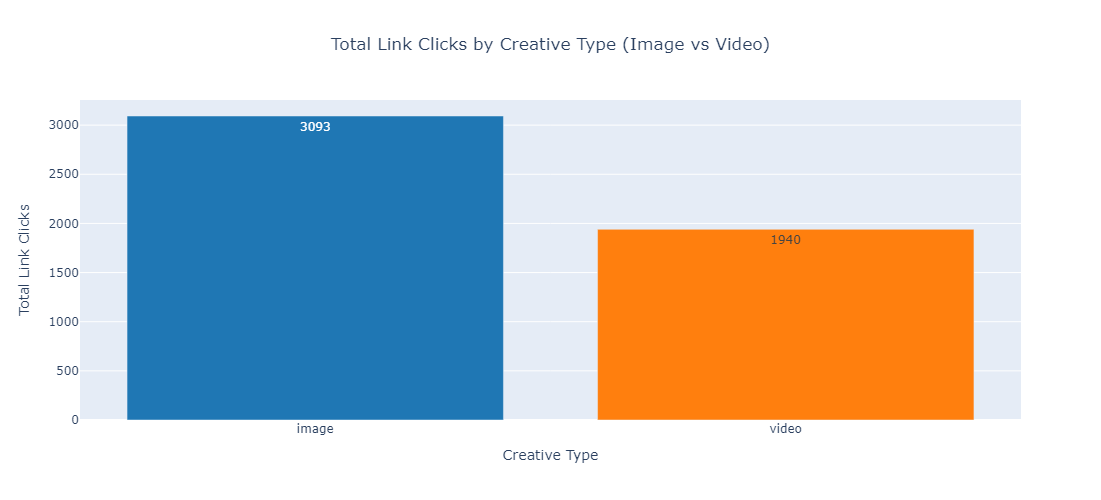

In [54]:
clicks_by_creative = data_after.groupby('Creative')['Link clicks'].sum().reset_index()

# Rename columns
clicks_by_creative.columns = ['Creative', 'Total Link Clicks']

# Create bar plot for Link Clicks
fig_clicks = px.bar(clicks_by_creative, 
                    x='Creative', 
                    y='Total Link Clicks', 
                    color='Creative',
                    title='Total Link Clicks by Creative Type (Image vs Video)',
                    text='Total Link Clicks',  
                    color_discrete_sequence=['#1f77b4', '#ff7f0e'])

# Update layout
fig_clicks.update_layout(
    width=700,
    height=500,
    xaxis_title='Creative Type',
    yaxis_title='Total Link Clicks',
    showlegend=False,
    title_x=0.5
)

# Show the plot
fig_clicks.show()

C:\Users\Muslim Aqeel\AppData\Local\Temp\ipykernel_12500\1553663314.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





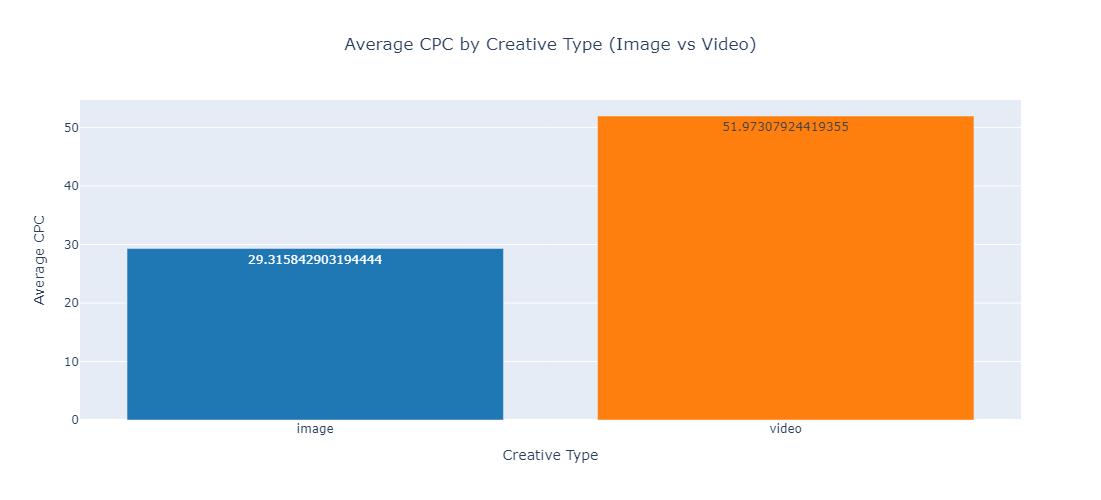

In [55]:
data_after['Creative'].fillna('image', inplace=True)

# Group by 'Creative' and calculate the average CPC
cpc_by_creative = data_after.groupby('Creative')['CPC (cost per link click)'].mean().reset_index()

# Rename columns
cpc_by_creative.columns = ['Creative', 'Average CPC']

# Create bar plot for CPC
fig_cpc = px.bar(cpc_by_creative, 
                 x='Creative', 
                 y='Average CPC', 
                 color='Creative',
                 title='Average CPC by Creative Type (Image vs Video)',
                 text='Average CPC',  
                 color_discrete_sequence=['#1f77b4', '#ff7f0e'])

# Update layout
fig_cpc.update_layout(
    width=700,
    height=500,
    xaxis_title='Creative Type',
    yaxis_title='Average CPC',
    showlegend=False,
    title_x=0.5
)

# Show the plot
fig_cpc.show()

In [56]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_after.columns = data_after.columns.str.replace(' ', '_')

model = smf.mixedlm('Link_clicks ~ Age', data_after, groups=data_after['Ad_name']).fit()

print("Hierarchical Model Summary:")
print(model.summary())


Hierarchical Model Summary:
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Link_clicks
No. Observations: 206     Method:             REML       
No. Groups:       28      Scale:              1388.2756  
Min. group size:  2       Log-Likelihood:     -1031.3750 
Max. group size:  18      Converged:          Yes        
Mean group size:  7.4                                    
---------------------------------------------------------
              Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
---------------------------------------------------------
Intercept     30.781    6.910  4.455 0.000  17.238 44.323
Age[T.25-34]  14.121    8.255  1.711 0.087  -2.059 30.301
Age[T.35-44]  -3.802    8.476 -0.449 0.654 -20.414 12.811
Age[T.45-54] -20.324    8.259 -2.461 0.014 -36.511 -4.136
Age[T.55-64] -25.848    9.484 -2.725 0.006 -44.437 -7.260
Age[T.65+]   -30.113   10.348 -2.910 0.004 -50.396 -9.831
Group Var    355.840    4.610                         

In [57]:
data_after['Age'].replace({'18-24': '1', '25-34': '2', '35-44': '3', '45-54': '4', '55-64': '5', '65+': '6'}, inplace=True)
data_after['Age'] = data_after['Age'].astype(int)

# Replace values in 'Gender' and convert to integer
data_after['Gender'].replace({'male': '1', 'female': '2'}, inplace=True)
data_after['Gender'] = data_after['Gender'].astype(int)

# Replace values in 'Creative' and convert to integer
data_after['Creative'].replace({'video': '1', 'image': '2'}, inplace=True)
data_after['Creative'] = data_after['Creative'].astype(int)

C:\Users\Muslim Aqeel\AppData\Local\Temp\ipykernel_12500\3022719466.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Muslim Aqeel\AppData\Local\Temp\ipykernel_12500\3022719466.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [58]:
data_after.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 0 to 496
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               206 non-null    int32  
 1   Gender                            206 non-null    int32  
 2   Ad_name                           206 non-null    object 
 3   Reach                             206 non-null    int64  
 4   Impressions                       206 non-null    int64  
 5   Frequency                         206 non-null    float64
 6   Result_Type                       143 non-null    object 
 7   Results                           143 non-null    float64
 8   Cost_per_result                   143 non-null    float64
 9   Amount_spent_(PKR)                206 non-null    float64
 10  CPM_(cost_per_1,000_impressions)  206 non-null    float64
 11  Link_clicks                       206 non-null    float64
 12  CPC_(cost_per

## Bayesian Linear Regression Model for Predicting Cost Per Result

In [67]:
age = data_after['Age'].values
reach = data_after['Reach'].values
impressions = data_after['Impressions'].values
cost_per_result = data_after['CPC_(cost_per_link_click)'].values

In [69]:
with pm.Model() as bayesian_model:
    
    
    beta_age = pm.Normal('beta_age', mu=0, sigma=1)
    beta_reach = pm.Normal('beta_reach', mu=0, sigma=1)
    beta_impressions = pm.Normal('beta_impressions', mu=0, sigma=1)
    intercept = pm.Normal('intercept', mu=0, sigma=1)
    
   
    mu = (beta_age * age + beta_reach * reach + beta_impressions * impressions + intercept)
    
    
    sigma = pm.HalfNormal('sigma', sigma=1)
    likelihood = pm.Normal('likelihood', mu=mu, sigma=sigma, observed=cost_per_result)
    
    
    trace = pm.sample(1000, return_inferencedata=True)
    

pm.summary(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta_age, beta_reach, beta_impressions, intercept, sigma]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 54 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
beta_age           5.875  0.414   5.077    6.612      0.012    0.009   
beta_impressions   0.001  0.001  -0.001    0.003      0.000    0.000   
beta_reach        -0.000  0.002  -0.003    0.003      0.000    0.000   
intercept          5.305  0.953   3.473    7.074      0.027    0.019   
sigma             18.921  0.458  18.046   19.778      0.013    0.009   

                  ess_bulk  ess_tail  r_hat  
beta_age            1151.0    1215.0   1.00  
beta_impressions    1223.0    1100.0   1.00  
beta_reach          1219.0    1152.0   1.00  
intercept           1270.0    1066.0   1.00  
sigma               1313.0    1086.0   1.01

## Predictive Modelling Using Deep Neural Network

In [59]:
features = ['Creative', 'Age', 'Gender', 'Reach', 'Impressions']
target = ['Link_clicks', 'CPC', 'Amount_spent_(PKR)']

X = data_after[features]
y = data_after[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model_dl = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(y.shape[1])
])

# Compile the model
model_dl.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model_dl.fit(X_train, y_train, epochs=100, batch_size=5, validation_split=0.2, verbose=1)

# Make predictions
y_pred = model_dl.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')
print('Mean Squared Error for each target:', mse)
print('R^2 Score for each target:', r2)

Epoch 1/100
27/27 [==============================] - 2s 19ms/step - loss: 65787.6172 - val_loss: 921313.2500
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 41905.9688 - val_loss: 514258.8438
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 45608.3828 - val_loss: 500195.9688
Epoch 4/100
27/27 [==============================] - 0s 4ms/step - loss: 42305.5547 - val_loss: 720789.0000
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 36541.3086 - val_loss: 472733.1562
Epoch 6/100
27/27 [==============================] - 0s 6ms/step - loss: 53389.1680 - val_loss: 911981.3125
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 53514.7930 - val_loss: 451805.5312
Epoch 8/100
27/27 [==============================] - 0s 4ms/step - loss: 49714.7852 - val_loss: 572428.0000
Epoch 9/100
27/27 [==============================] - 0s 4ms/step - loss: 46255.2500 - val_loss: 800213.6875
Epoch 10/100
27/27 [=======

In [61]:
creative = int(input("Enter the Creative  (0 for Image, 1 for Video ): "))
gender = int(input("Enter Gender (0 for Female, 1 for Male): "))
age = int(input("Enter Age Group (1 for '18-24', 2 for '25-34', 3 for '35-44', 4 for '45-54', 5 for '55-64', 6 for '65+'): "))
reach = int(input("Enter Reach: "))
impressions = int(input("Enter Impressions: "))

input_data = pd.DataFrame({
    'Creative': [creative],
    'Gender': [gender],
    'Age': [age],
    'Reach': [reach],
    'Impressions': [impressions]
})


input_data = input_data.astype(np.float32)


predicted_values = model_dl.predict(input_data)


print("Predicted Link Clicks:", predicted_values[0][0])
print("Predicted Cost per Result:", predicted_values[0][1])
print("Predicted Amount Spent (PKR):", predicted_values[0][2])

Enter the Creative  (0 for Image, 1 for Video ):  0
Enter Gender (0 for Female, 1 for Male):  1
Enter Age Group (1 for '18-24', 2 for '25-34', 3 for '35-44', 4 for '45-54', 5 for '55-64', 6 for '65+'):  2
Enter Reach:  70000
Enter Impressions:  99000


1/1 [==============================] - 0s 120ms/step
Predicted Link Clicks: 524.3075
Predicted Cost per Result: 428.03555
Predicted Amount Spent (PKR): 16911.342


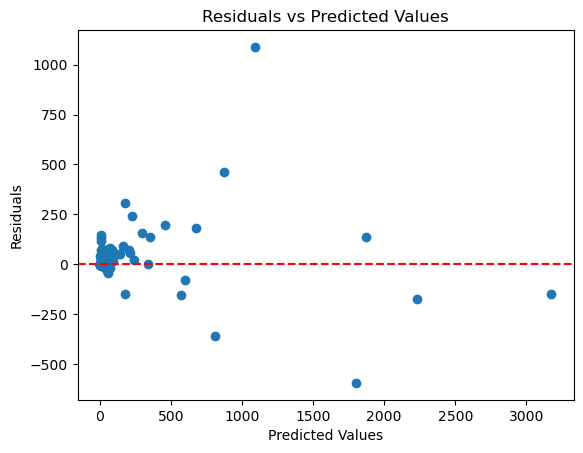

In [63]:
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()